# -----------------------------------------------------------------------------------------

# CAPTONE PROJECT : Comparative Analysis of Machine Learning Models for Bollywood Movie Success Estimation

# ---------------------------------------------------------------------------------------

## INTRODUCTION

Dataset

This is movie list from imbd this dataset is obtained from kaggle.
Link:https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies/data



## Problem Statement
Predict the IMDb rating of Indian movies based on various factors like genre,rating,vote, director, cast,  to understand the key influencers on movie ratings.



## Objective
-Identify the factors that most strongly correlate with high IMDb ratings.

-Build a predictive model to estimate IMDb ratings based on available features.

-Evaluate the model's performance and provide recommendations for filmmakers and producers.

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("../capstone_project/IMDb Movies India.csv", encoding='ISO-8859-1')
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


# -----------------------------------------------------------

# DATA WRANGLING

# -----------------------------------------------------------

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
df.shape

(15509, 10)

In [6]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

### TO SEE DATA MORE CLEAR MANNER

In [7]:
df.Genre.unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [8]:
df.Genre.nunique()

485

In [9]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
def data_overview(df):
    print(f"This is overview of training dataset")
    print(f"Rows:-->",df.shape[0])
    print(f"Number of Features/Columns:-->",df.shape[1])
    print(f"Features/Columns:-->",df.columns.tolist())
    print(f"Missing Values:")
    print(df.isnull().sum())
    print(f"Total Missing Values:-->",df.isnull().sum().values.sum())
    print(f"Unique Values:")
    print(df.nunique())

In [11]:
data_overview(df)

This is overview of training dataset
Rows:--> 15509
Number of Features/Columns:--> 10
Features/Columns:--> ['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
Missing Values:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64
Total Missing Values:--> 33523
Unique Values:
Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64


## We can notice that the top 4 genre in indian movies but it not accurate as some movies prioritise only one genre and other movies has multiple genres thus the value in inaccurate 

## Example 
### Romance is "708" But at the same time DRAMA AND ROMANCE IS "524" THIS PROVES THE HYPOTHESIS ABOVE

In [12]:
#genre, director, and actors values counts
df["Genre"].value_counts()

Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [13]:
df["Director"].value_counts()

Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: Director, Length: 5938, dtype: int64

## we need to drop null values for the columns name and year because without name and year the prediction will be inacurate

In [14]:
df.dropna(subset=['Name','Year'],inplace=True)
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [15]:
df.isna().sum()

Name           0
Year           0
Duration    7866
Genre       1841
Rating      7062
Votes       7061
Director     497
Actor 1     1488
Actor 2     2197
Actor 3     2907
dtype: int64

## THIS DATASET IS UPDATED TILL YEAR 2021 BUT THERE ARE ALSO DATA FOR YEAR 2022

## THE PROBLEM IS ALL THE DATA FOR YEAR 2022 IS FOR UPCOMING MOVIES THUS THERE WILL BE ALOT OF NAN VALUES

In [16]:
#removing the paranthesis 
# we also change the year to int because previosly it is in object type
df['Year'] = df['Year'].str.strip('()').astype(int)


sorted_unique_years = df['Year'].unique()
sorted_unique_years.sort()

print(sorted_unique_years)


[1913 1914 1915 1917 1922 1923 1924 1926 1928 1930 1931 1932 1933 1934
 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948
 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022]


In [17]:
df[df["Year"]==2022].head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
640,Adipurush,2022,NaN,"Action, Drama, History",NaN,NaN,Om Raut,Prabhas,Saif Ali Khan,Kriti Sanon
1065,Animal,2022,NaN,"Action, Drama",NaN,NaN,Sandeep Reddy Vanga,Ranbir Kapoor,Parineeti Chopra,Anil Kapoor
1537,Baba Teerthnath,2022,NaN,"Comedy, Drama",NaN,NaN,Kunjan Verma,Hanan Baba,Prerna Rawat,Dhruv Lau
1557,Bachchan Pandey,2022,NaN,Action,NaN,NaN,Farhad Samji,Akshay Kumar,Jacqueline Fernandez,Kriti Sanon
1572,Backwaters,2022,NaN,"Drama, Thriller",NaN,NaN,Abhinav Thakur,NaN,NaN,NaN
1921,Battle of Saraighat,2022,NaN,History,NaN,NaN,Sudipto Sen,NaN,NaN,NaN
2221,Bhediya,2022,NaN,"Comedy, Horror",NaN,NaN,Amar Kaushik,Kriti Sanon,Varun Dhawan,Abhishek Banerjee
2699,Chaalbaaz in London,2022,NaN,Comedy,NaN,NaN,Pankaj Parashar,Shraddha Kapoor,NaN,NaN
3162,Cirkus,2022,112 min,Comedy,NaN,NaN,Rohit Shetty,Jacqueline Fernandez,Pooja Hegde,Ranveer Singh
4534,Ek Villain Returns,2022,NaN,"Action, Thriller",NaN,NaN,Mohit Suri,Disha Patani,John Abraham,Arjun Kapoor


## Now we remove the data in year 2022 

In [18]:
## remove all data in year 2022
df = df[df['Year'] != 2022]

In [19]:
sorted_unique_years = df['Year'].unique()
sorted_unique_years.sort()

print(sorted_unique_years)

[1913 1914 1915 1917 1922 1923 1924 1926 1928 1930 1931 1932 1933 1934
 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948
 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021]


### Now from here we can see that Year,Duration,Rating and Votes are in object type we want to change that either into integer and floats
### We also need to modify
Votes- we need to remove ","

Duration-remove "min"

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14943 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      14943 non-null  object 
 1   Year      14943 non-null  int32  
 2   Duration  7111 non-null   object 
 3   Genre     13102 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14447 non-null  object 
 7   Actor 1   13463 non-null  object 
 8   Actor 2   12756 non-null  object 
 9   Actor 3   12055 non-null  object 
dtypes: float64(1), int32(1), object(8)
memory usage: 1.2+ MB


In [21]:
#changing datatype with some string replacing
#There will be a error for Unable to parse string "$5.16M" at position 9215 so we run the code below
df["Votes"]=df["Votes"].replace("$5.16M", 516)
df["Votes"] = pd.to_numeric(df['Votes'].str.replace(',',''))


#We are changing the datatype for column 'Duration'
df['Duration']= df['Duration'].str.replace('min','').apply(pd.to_numeric)

#We are changing the datatype for column 'Duration'
df['Director'] = df['Director'].astype(str)
df['Director'] = df['Director'].str.strip()

#We are changing the datatype for column 'Genre'
df['Genre'] = df['Genre'].astype(str)
df['Genre'] = df['Genre'].str.strip()


#We are changing the datatype for column 'Name'
df['Name'] = df['Name'].astype(str)
df['Name'] = df['Name'].str.strip()


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14943 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      14943 non-null  object 
 1   Year      14943 non-null  int32  
 2   Duration  7111 non-null   float64
 3   Genre     14943 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   float64
 6   Director  14943 non-null  object 
 7   Actor 1   13463 non-null  object 
 8   Actor 2   12756 non-null  object 
 9   Actor 3   12055 non-null  object 
dtypes: float64(3), int32(1), object(6)
memory usage: 1.2+ MB


In [23]:
df.isna().sum()

Name           0
Year           0
Duration    7832
Genre          0
Rating      7024
Votes       7024
Director       0
Actor 1     1480
Actor 2     2187
Actor 3     2888
dtype: int64

### We can see that the null values for Rating,Duration and Votes can be replaced and should be replaced. But Director,Actor1,Actor2 and Actor3 cannot be replaced and the null values also won't affect that much.

In [24]:
#replacing null values with the most common rating given to an Indian Movie
df['Rating'].fillna(df['Rating'].mode().max(),inplace=True)

#replacing null values with average duration of a movie in India
df['Duration'].fillna(df['Duration'].mean(),inplace=True)

#replacing null values with average votes recived by a Movie
df['Votes'].fillna(df['Votes'].mean(),inplace=True)

In [25]:
df.fillna(value={"Genre":"Unknown","Director":"Unknown","Actor 1":"Unknown","Actor 2":"Unknown","Actor 3":"Unknown"},inplace=True)

In [26]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

## LETS SIMPLIFY THE ACTORS 1,2,3 COLUMNS INTO A SINGLE ACTORS COLUMN

In [27]:
# Create a new "Actors" column by combining the actor names from all three columns
df['Actors'] = df.apply(lambda row: [actor for actor in [row['Actor 1'], row['Actor 2'], row['Actor 3']] if actor != 'Unknown'], axis=1)

# Replace empty lists (where all actors were 'Unknown') with a single entry of 'Unknown'
df['Actors'] = df['Actors'].apply(lambda x: ['Unknown'] if not x else x)

# Drop the original "Actor 1", "Actor 2", "Actor 3" columns if needed
df.drop(['Actor 1', 'Actor 2', 'Actor 3'], axis=1, inplace=True)




In [28]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.000000,Gaurav Bakshi,"[Rasika Dugal, Vivek Ghamande, Arvind Jangid]"
2,#Homecoming,2021,90.0,"Drama, Musical",6.2,1938.520394,Soumyajit Majumdar,"[Sayani Gupta, Plabita Borthakur, Roy Angana]"
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.000000,Ovais Khan,"[Prateik, Ishita Raj, Siddhant Kapoor]"
4,...And Once Again,2010,105.0,Drama,6.2,1938.520394,Amol Palekar,"[Rajat Kapoor, Rituparna Sengupta, Antara Mali]"
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.000000,Rahul Rawail,"[Bobby Deol, Aishwarya Rai Bachchan, Shammi Ka..."
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086.000000,Shoojit Sircar,"[Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma]"
7,.in for Motion,2008,59.0,Documentary,6.2,1938.520394,Anirban Datta,[Unknown]
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326.000000,Allyson Patel,"[Yash Dave, Muntazir Ahmad, Kiran Bhatia]"
9,@Andheri,2014,116.0,"Action, Crime, Thriller",4.0,11.000000,Biju Bhaskar Nair,"[Augustine, Fathima Babu, Byon]"
10,1:1.6 An Ode to Lost Love,2004,96.0,Drama,6.2,17.000000,Madhu Ambat,"[Rati Agnihotri, Gulshan Grover, Atul Kulkarni]"


# -----------------------------------------------------------

# Exploratory data analysis

# -----------------------------------------------------------

## Top 10 Movies According to Rating

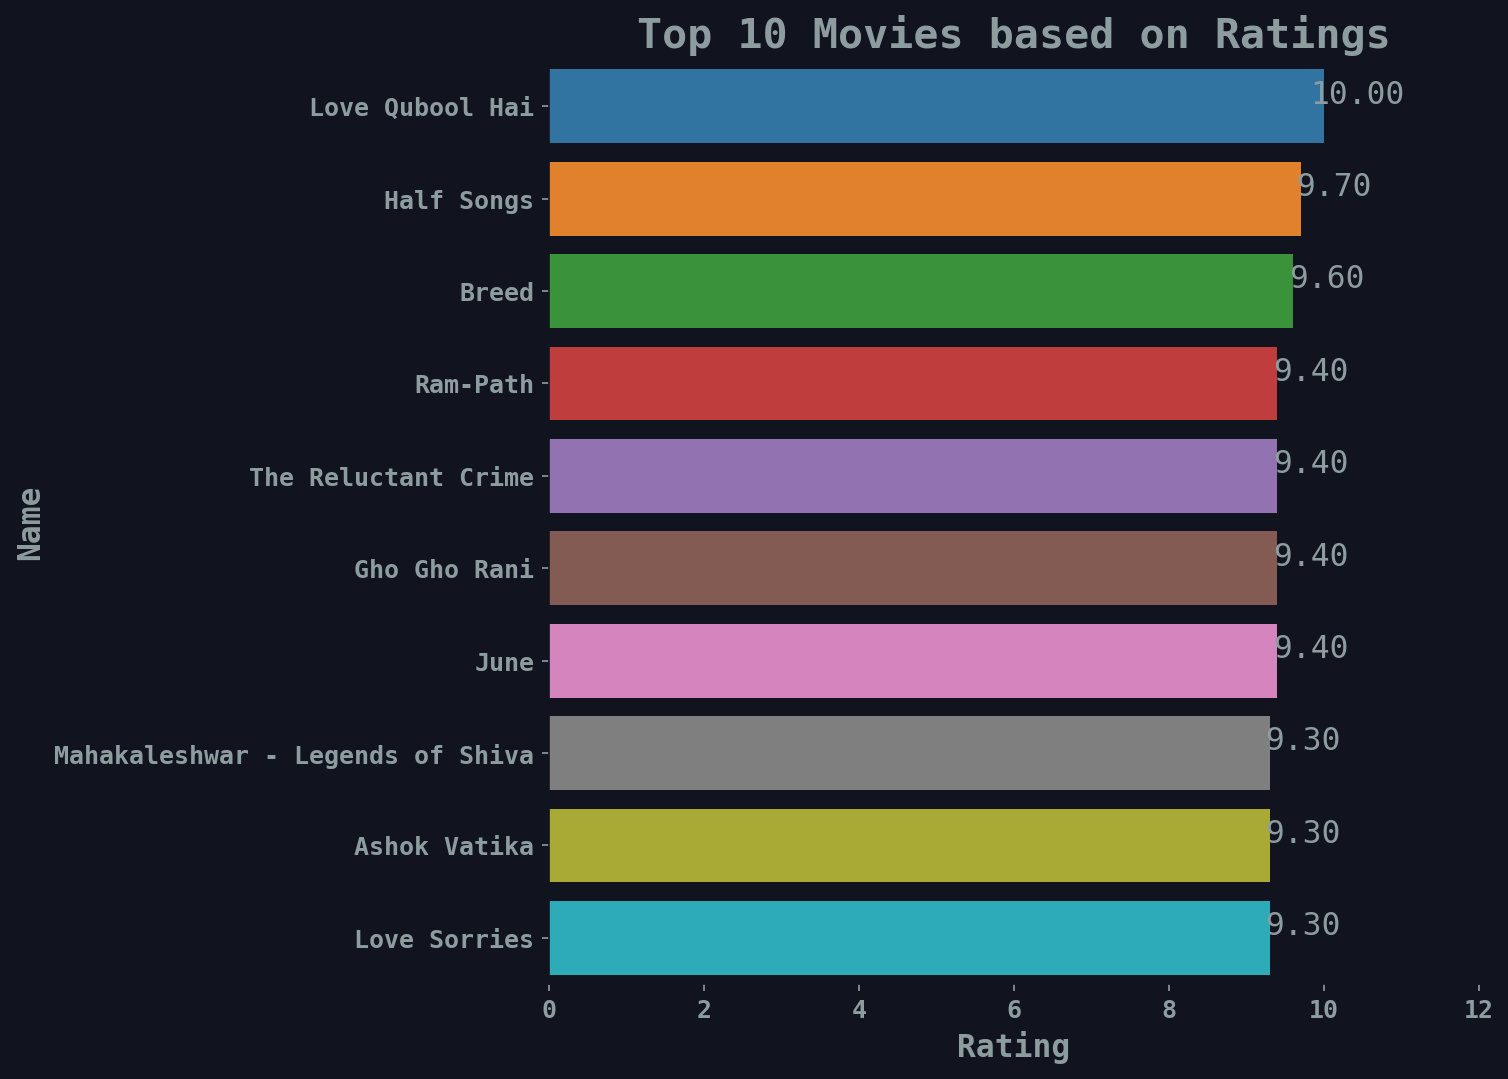

In [29]:
#intializing figure of the chart
plt.figure(figsize=(8, 8))

#Dropping the index where Year is 2022,as 2022 is in future
dframe= df.set_index('Year')
##dframe.drop(index='2022',inplace=True)

#sorting Name and Rating by Rating then selecting top 10
top_movies= dframe[['Name','Rating']].sort_values(by='Rating',ascending=False).head(10)

#Plotting Bar chart
plots = sns.barplot(x="Rating", y="Name", data=top_movies)
  

#Plotting Labels for bars
for bar in plots.patches:
    
    plots.annotate(format(bar.get_width(),'.2f'), 
                   (bar.get_x() + bar.get_width()+0.3, 
                    bar.get_y()+0.5), ha='center', va='center',
                   size=15, xytext=(5,10),
                   textcoords='offset points')

    
plt.xlabel("Rating",fontsize=15,fontweight='bold')
plt.ylabel("Name",fontsize=15,fontweight='bold')
plt.title("Top 10 Movies based on Ratings",fontsize=20,fontweight='bold')

plt.xticks(np.arange(0,13,2),fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

## Top 10 Movies According to Votes

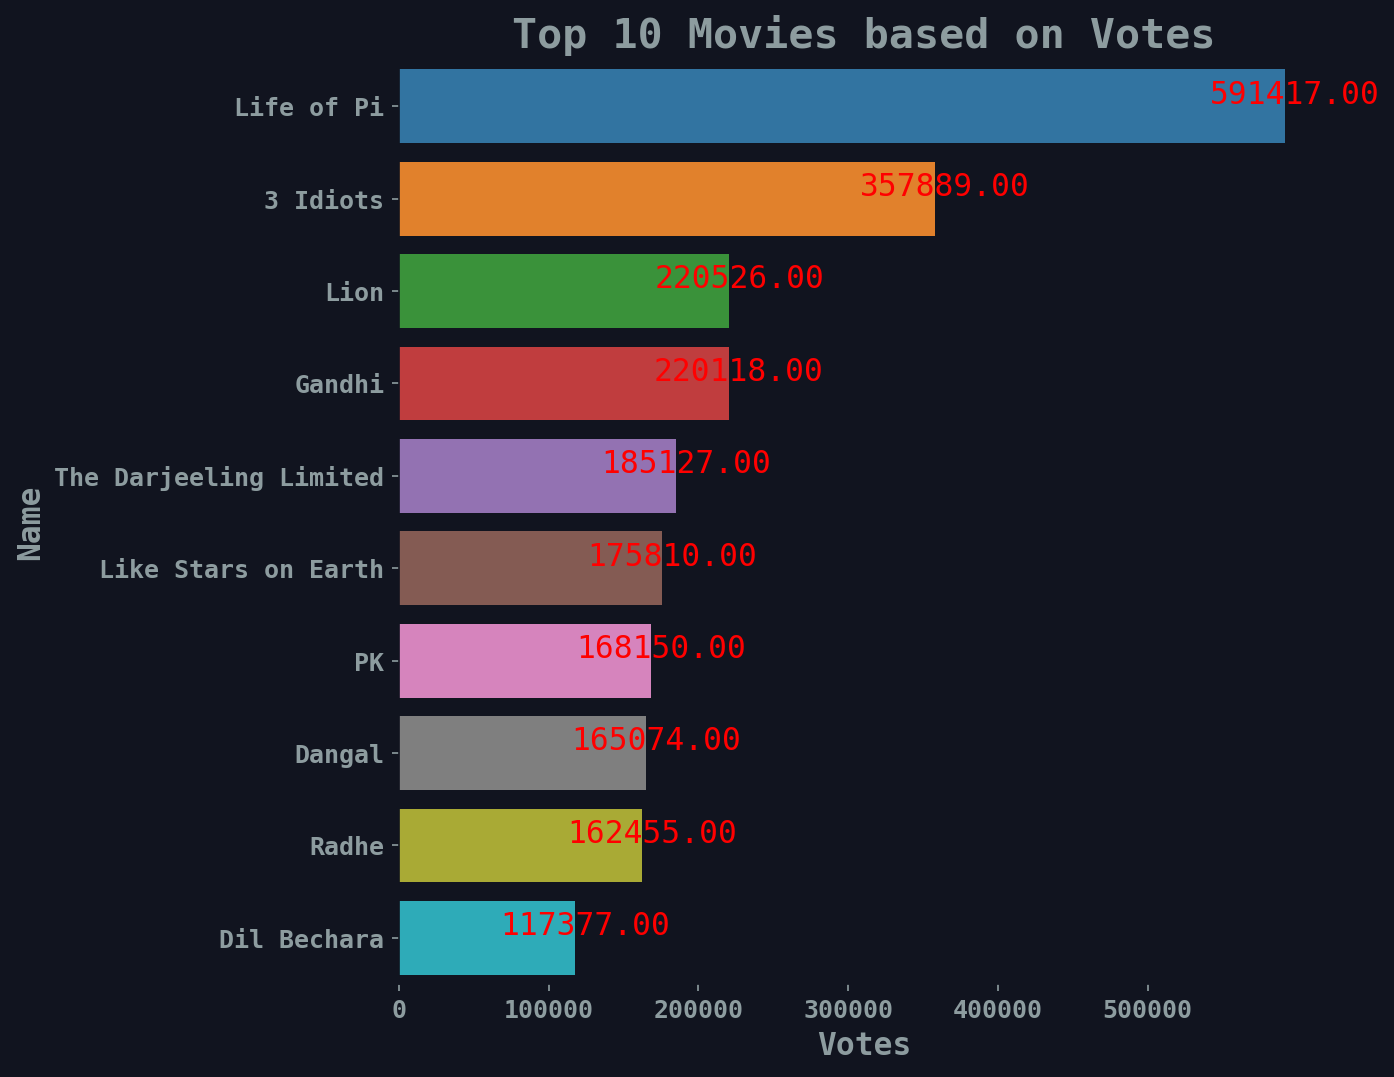

In [30]:
#sorting Name and Rating by Rating then selecting top 10
top_movies= dframe[['Name','Votes']].sort_values(by='Votes',ascending=False).head(10)

#Plotting Bar chart
plt.figure(figsize=(8, 8))
plots = sns.barplot(x="Votes", y="Name", data=top_movies)
  

#Plotting Labels for bars
for bar in plots.patches:
    
    plots.annotate(format(bar.get_width(),'.2f'), 
                   (bar.get_x() + bar.get_width()+0.3, 
                    bar.get_y()+0.5), ha='center', va='center',
                   size=15, xytext=(5,10),
                   textcoords='offset points',color="red")

    
plt.xlabel("Votes",fontsize=15,fontweight='bold')
plt.ylabel("Name",fontsize=15,fontweight='bold')
plt.title("Top 10 Movies based on Votes",fontsize=20,fontweight='bold')

plt.xticks(np.arange(0,600000,100000),fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

## Top 10 Actors Who appears in most of the movies

## since we previosly fill na for actors values as "unknown" we should ignore that

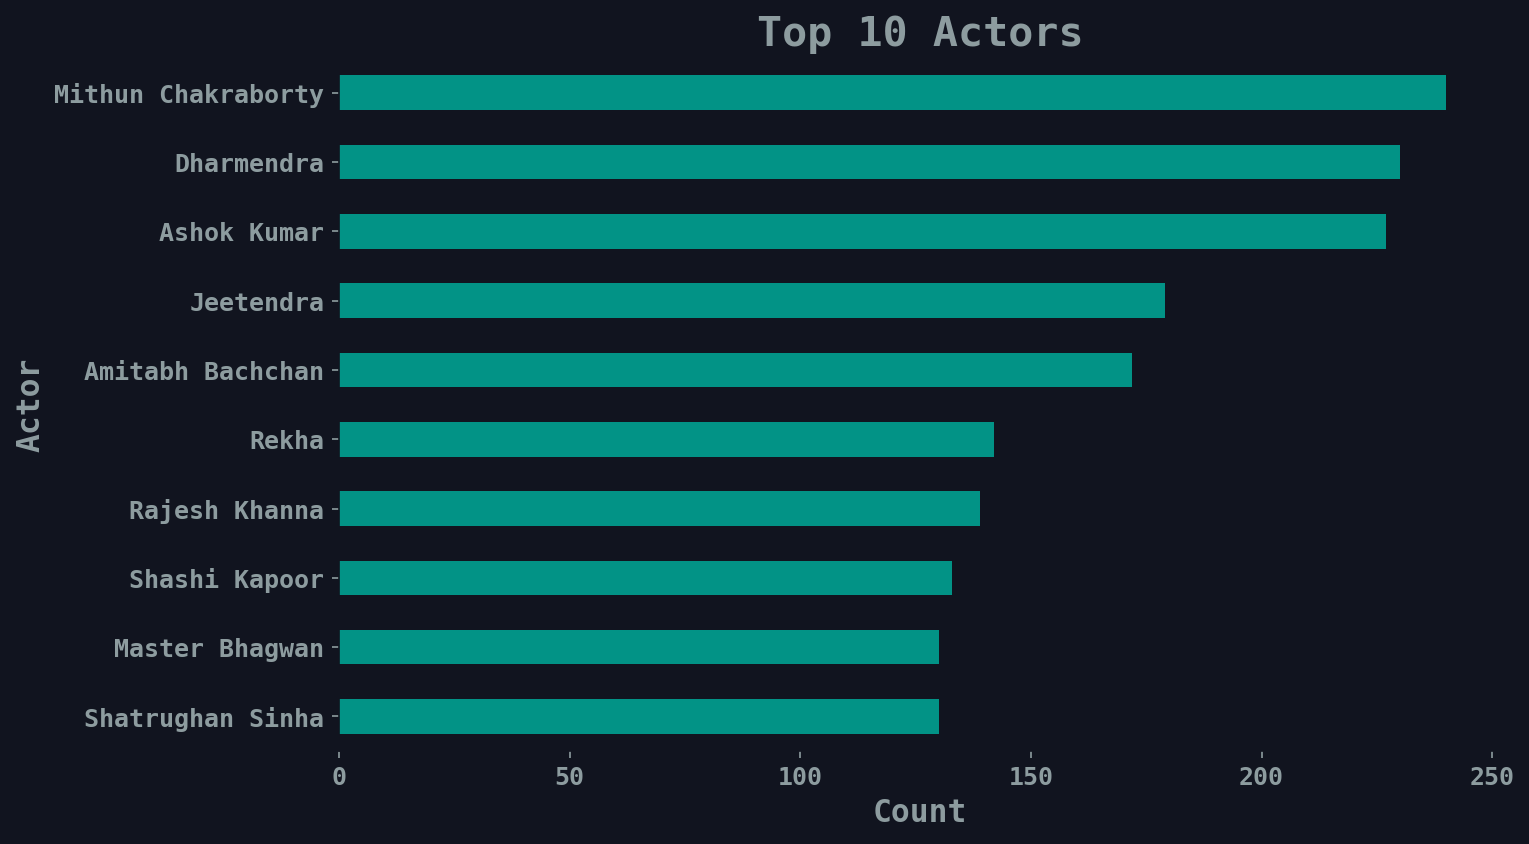

In [31]:

# Flatten the list of actors in each row and count their occurrences
all_actors = df['Actors'].sum()
actor_counts = pd.Series(all_actors).value_counts()

# Exclude 'Unknown' actor if present
actor_counts = actor_counts[actor_counts.index != 'Unknown']

# Get the top 10 most frequent actors
top_10_actors = actor_counts.head(10)

# Plotting Bar graph
plt.figure(figsize=(10, 6))
top_10_actors.sort_values().plot(kind='barh', color='#029386')

plt.title('Top 10 Actors', fontweight='bold', fontsize=20)
plt.xlabel('Count', fontweight='bold', fontsize=15)
plt.ylabel('Actor', fontweight='bold', fontsize=15)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

## Top 10 Genres for an Indian Movie

In [32]:
from collections import Counter

# Create a series for the Genre column and clean the data (remove leading/trailing spaces, convert to lowercase)
genre_series = dframe['Genre'].str.strip().str.lower()

# Initialize a Counter object
genre_counter = Counter()

# Mapping of genres to combine (handle variations in spaces and capitalization)
genre_combinations = {
    'drama': ['drama', ' drama'],
    'romance': ['romance', ' romance'],
    'thriller': ['thriller', ' thriller'],
    'crime': ['crime', ' crime']
}

# Split the values if a row contains more than one value and combine specified genres
for response in genre_series:
    # Skip 'unknown' genre
    if response == 'unknown':
        continue
    
    # Clean the values by removing extra spaces and converting to lowercase
    cleaned_response = ','.join(genre.strip().lower() for genre in response.split(','))
    
    # Update the counter for specified genres
    for main_genre, variations in genre_combinations.items():
        if any(variant in cleaned_response for variant in variations):
            genre_counter[main_genre] += 1
    
    # Update the counter for other genres
    genre_counter.update(genre for genre in cleaned_response.split(',') if genre not in genre_combinations)

# Print the top 10 values with the most occurrences
print(genre_counter.most_common(10))

# Create lists to store the Counter values
genres = []
frequency = []

for items in genre_counter.most_common(10):
    genres.append(items[0])
    frequency.append(items[1])

# Display the lists
print("Genres:", genres)
print("Frequencies:", frequency)


[('drama', 7016), ('action', 3469), ('romance', 2397), ('comedy', 1941), ('nan', 1841), ('thriller', 1612), ('crime', 1285), ('family', 927), ('musical', 577), ('adventure', 518)]
Genres: ['drama', 'action', 'romance', 'comedy', 'nan', 'thriller', 'crime', 'family', 'musical', 'adventure']
Frequencies: [7016, 3469, 2397, 1941, 1841, 1612, 1285, 927, 577, 518]


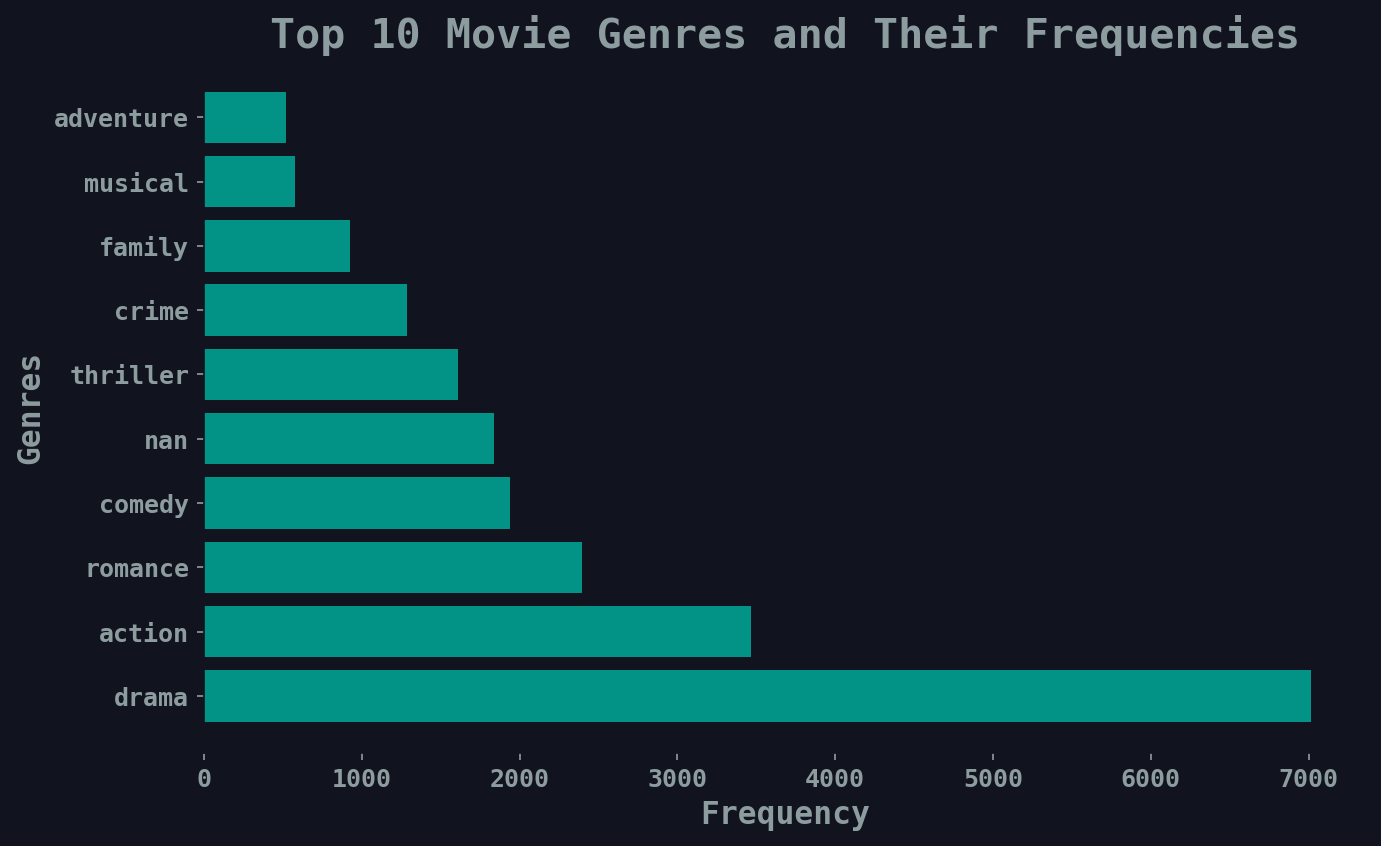

In [33]:

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(genres, frequency, color='#029386')
plt.xlabel('Frequency', fontsize=15, fontweight='bold')
plt.ylabel('Genres', fontsize=15, fontweight='bold')
plt.title('Top 10 Movie Genres and Their Frequencies', fontsize=20, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

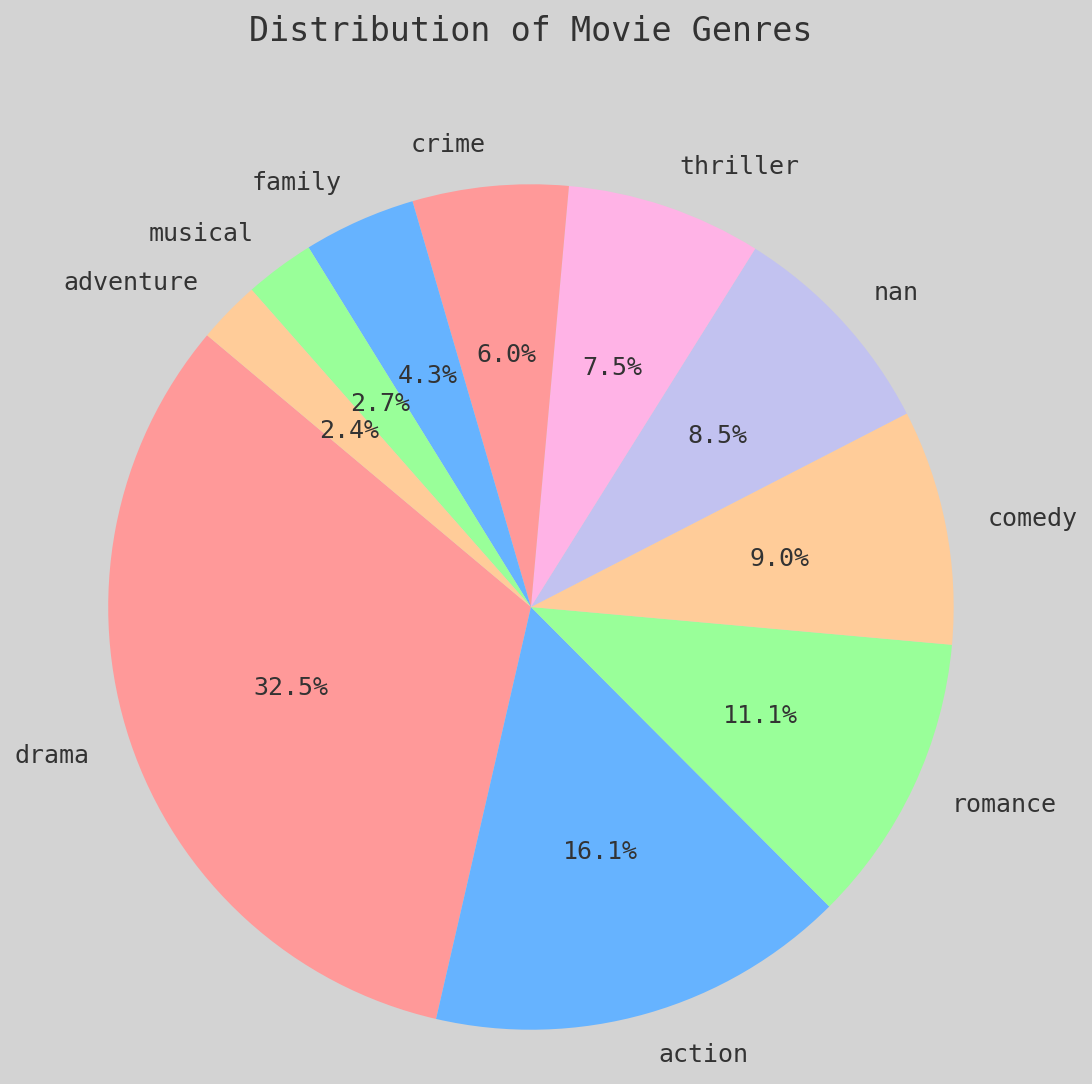

In [34]:
# Define custom colors for the pie chart segments
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6']

# Set a light background color for the plot
plt.figure(figsize=(8, 8), facecolor='lightgrey')

# Plot a pie chart for the genre counts with custom colors and number font color
plt.pie(frequency, labels=genres, autopct='%1.1f%%', startangle=140, colors=colors,
        textprops={'color': '#333333', 'fontsize': 12})  # Change the font color and size for the numbers

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set custom color for the title
title_color = '#333333'

# Plot the title with the specified color and size
plt.title('Distribution of Movie Genres', y=1.1, color=title_color, fontsize=16)

plt.show()

## GENRE TRENDS OVER THE YEARS

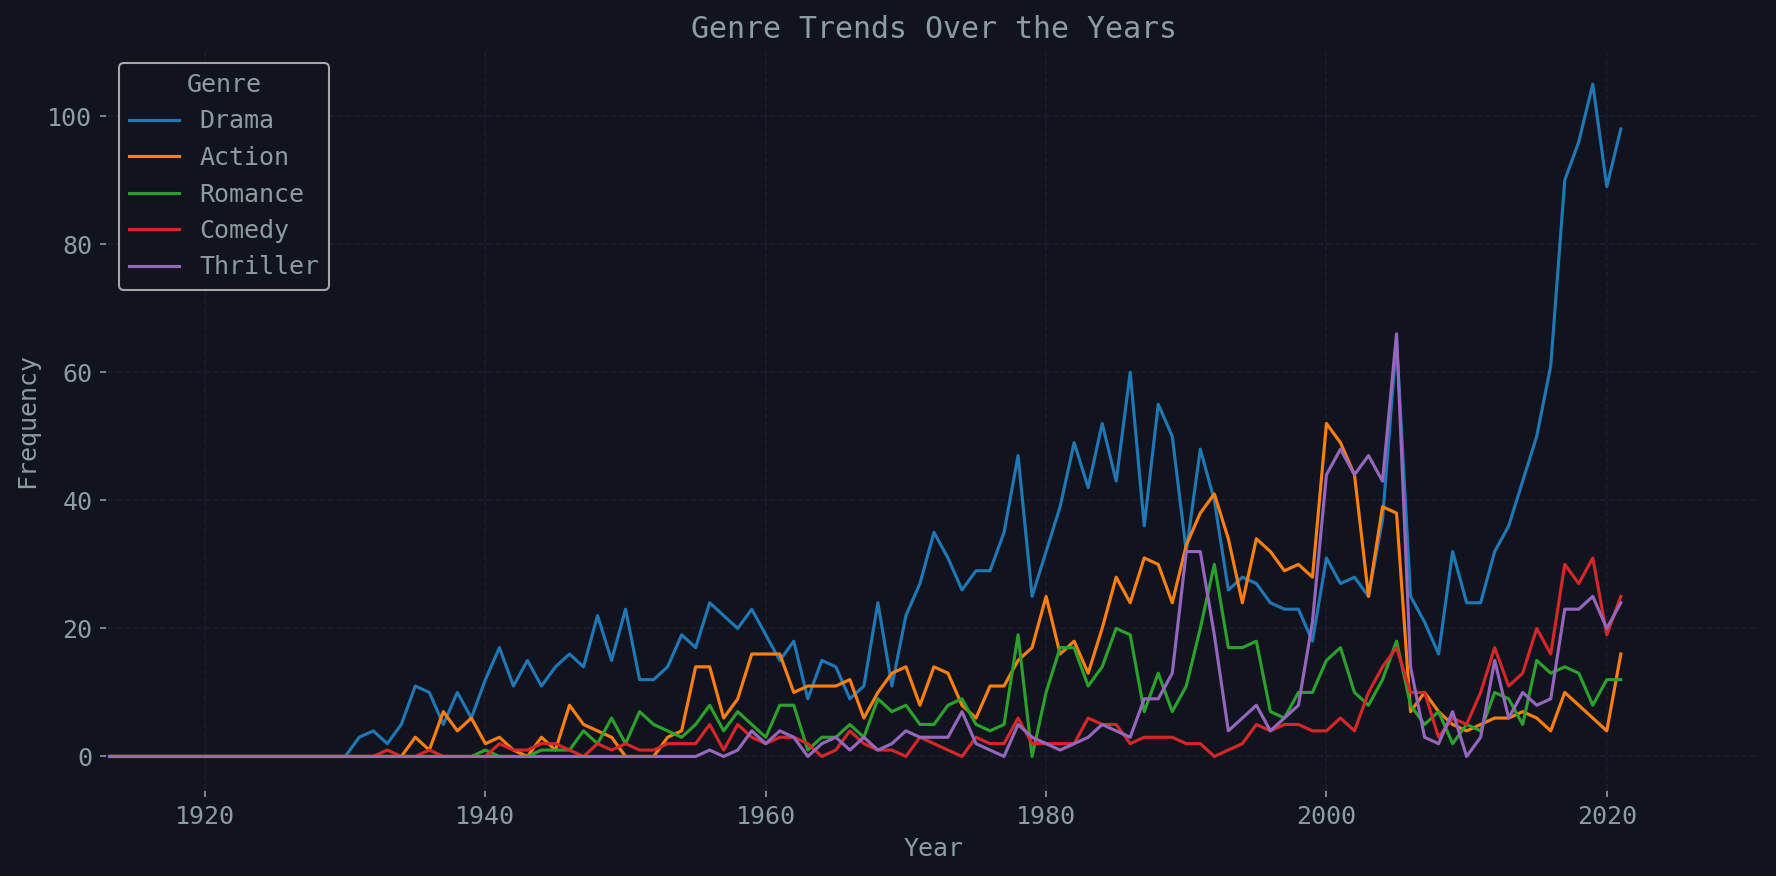

In [35]:
# Sample data for demonstration
# Assuming you have 'df' DataFrame with appropriate data

# Group by 'Year' and sum the counts for each genre
grouped = df.groupby('Year')['Genre'].value_counts().unstack().fillna(0)

# Select the top 5 genres
Top_5 = ['Drama', 'Action', 'Romance', 'Comedy', 'Thriller']

# Filter for the top 5 genres
filtered_genre_trend = grouped[Top_5]

# Plotting the genre trends over the years
plt.figure(figsize=(12, 6))

# Plot each genre
for genre in filtered_genre_trend.columns:
    plt.plot(filtered_genre_trend.index, filtered_genre_trend[genre], label=genre)

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Genre Trends Over the Years')
plt.legend(title='Genre')

plt.grid(True)
plt.tight_layout()

# Set x-axis limits to cover the desired range
plt.xlim(filtered_genre_trend.index.min(), filtered_genre_trend.index.max() + 10)  # Adjust the range as needed

plt.show()

## Number of Popular Movies Released from 2000 to 2021

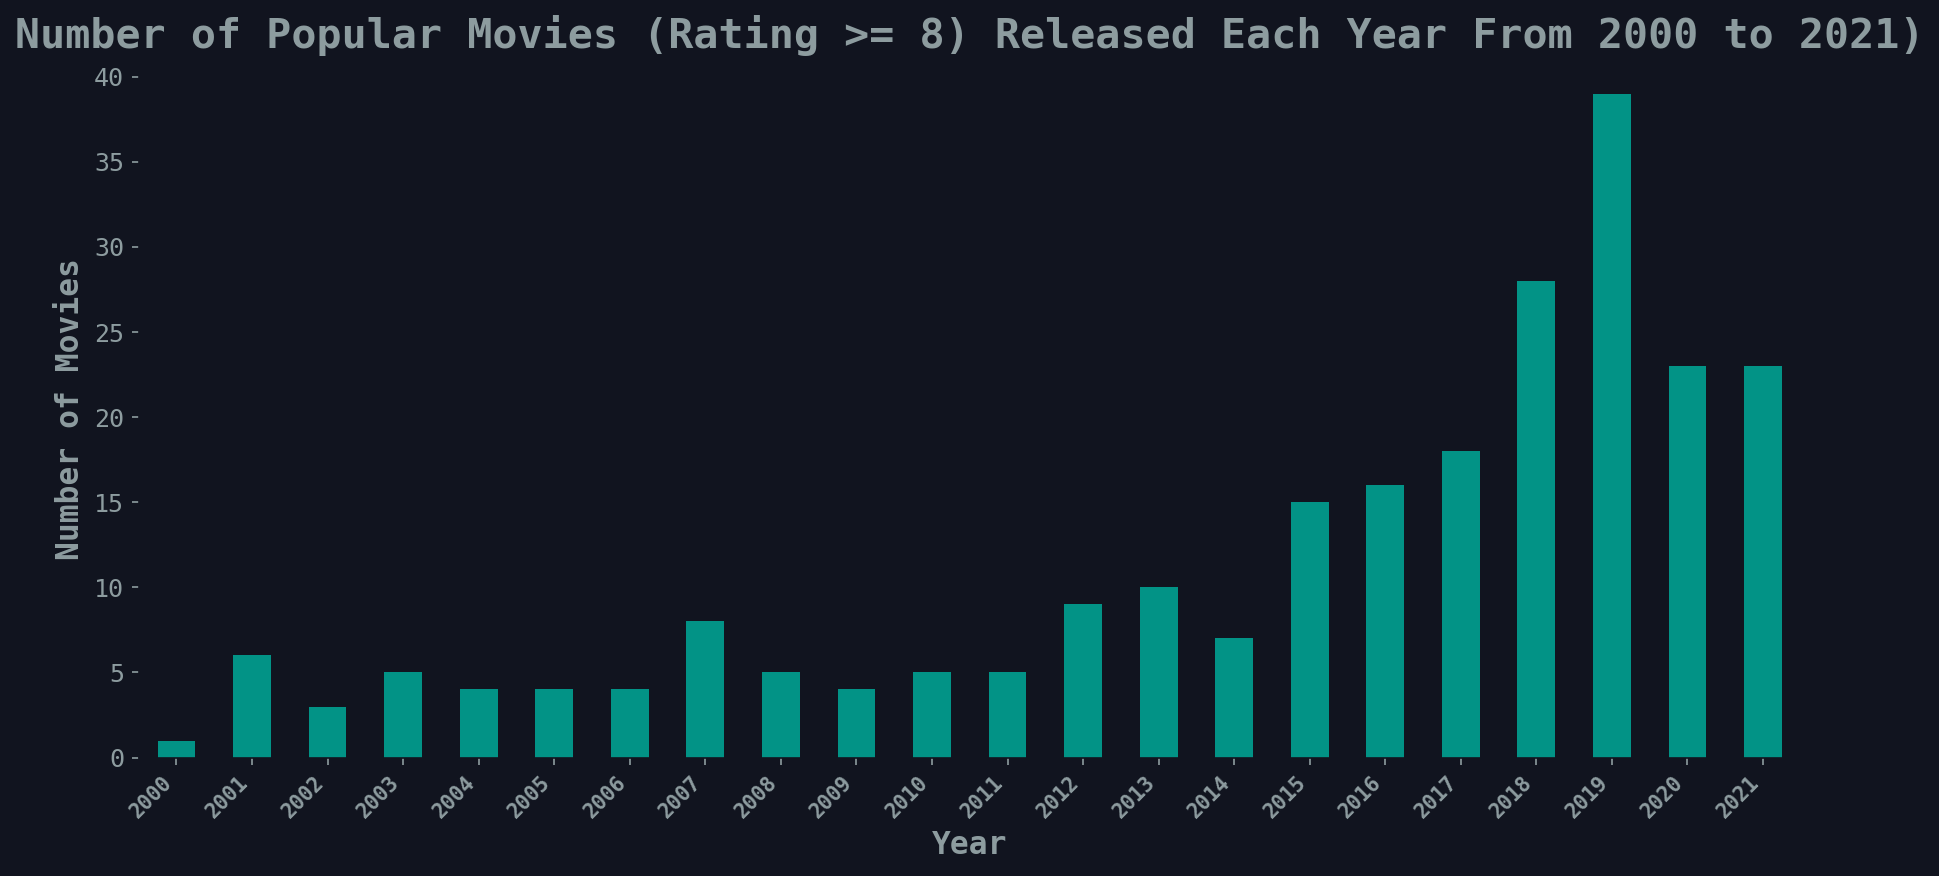

In [36]:
# Filter popular movies with a rating greater than or equal to 8
popular_high_rated_movies = df[(df['Rating'] >= 8.0)]

# Count the number of popular movies released each year within a selected range of 20 years
movies_per_year = popular_high_rated_movies['Year'].value_counts().sort_index()

# Select a range of 20 years
years_to_plot = range(2000, 2022)

# Filter the data for the selected range of years
filtered_movies_per_year = movies_per_year[movies_per_year.index.isin(years_to_plot)]

# Plotting Bar chart with the selected range of 20 years
plt.figure(figsize=(12, 6))
ax = filtered_movies_per_year.plot(kind='bar', color='#029386')

plt.title('Number of Popular Movies (Rating >= 8) Released Each Year From 2000 to 2021)', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=15, fontweight='bold')

# Improving x-axis labels
plt.xticks(range(len(filtered_movies_per_year.index)), filtered_movies_per_year.index, rotation=45, ha='right', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## TOP FIVE AND TOP 5 WORST DIRECTOR BASED ON RATING

In [37]:
# Remove rows with unknown directors
df_filtered = df[df['Director'] != 'Unknown']

# Count the number of movies for each director
director_movie_counts = df_filtered['Director'].value_counts()

# Filter directors with at least 10 movies
directors_with_10_or_more_movies = director_movie_counts[director_movie_counts >= 10].index

# Filter the data for selected directors
filtered_data = df_filtered[df_filtered['Director'].isin(directors_with_10_or_more_movies)]

# Calculate the mean rating for each director
director_avg_ratings = filtered_data.groupby('Director')['Rating'].mean()

# Select the top 5 directors by average rating
top_5_directors = director_avg_ratings.nlargest(5)

# Select the top 5 worst directors by average rating
worst_5_directors = director_avg_ratings.nsmallest(5)

In [38]:
top_5_directors

Director
Gulzar            7.340909
Anurag Kashyap    7.306667
Tapan Sinha       7.280000
Bimal Roy         7.229412
Raj Kapoor        7.145455
Name: Rating, dtype: float64

In [39]:
worst_5_directors

Director
Sikander Bharti         4.140000
Jagdish A. Sharma       4.154545
K.C. Bokadia            4.350000
Prabhu Deva             4.370000
Deepak S. Shivdasani    4.430000
Name: Rating, dtype: float64

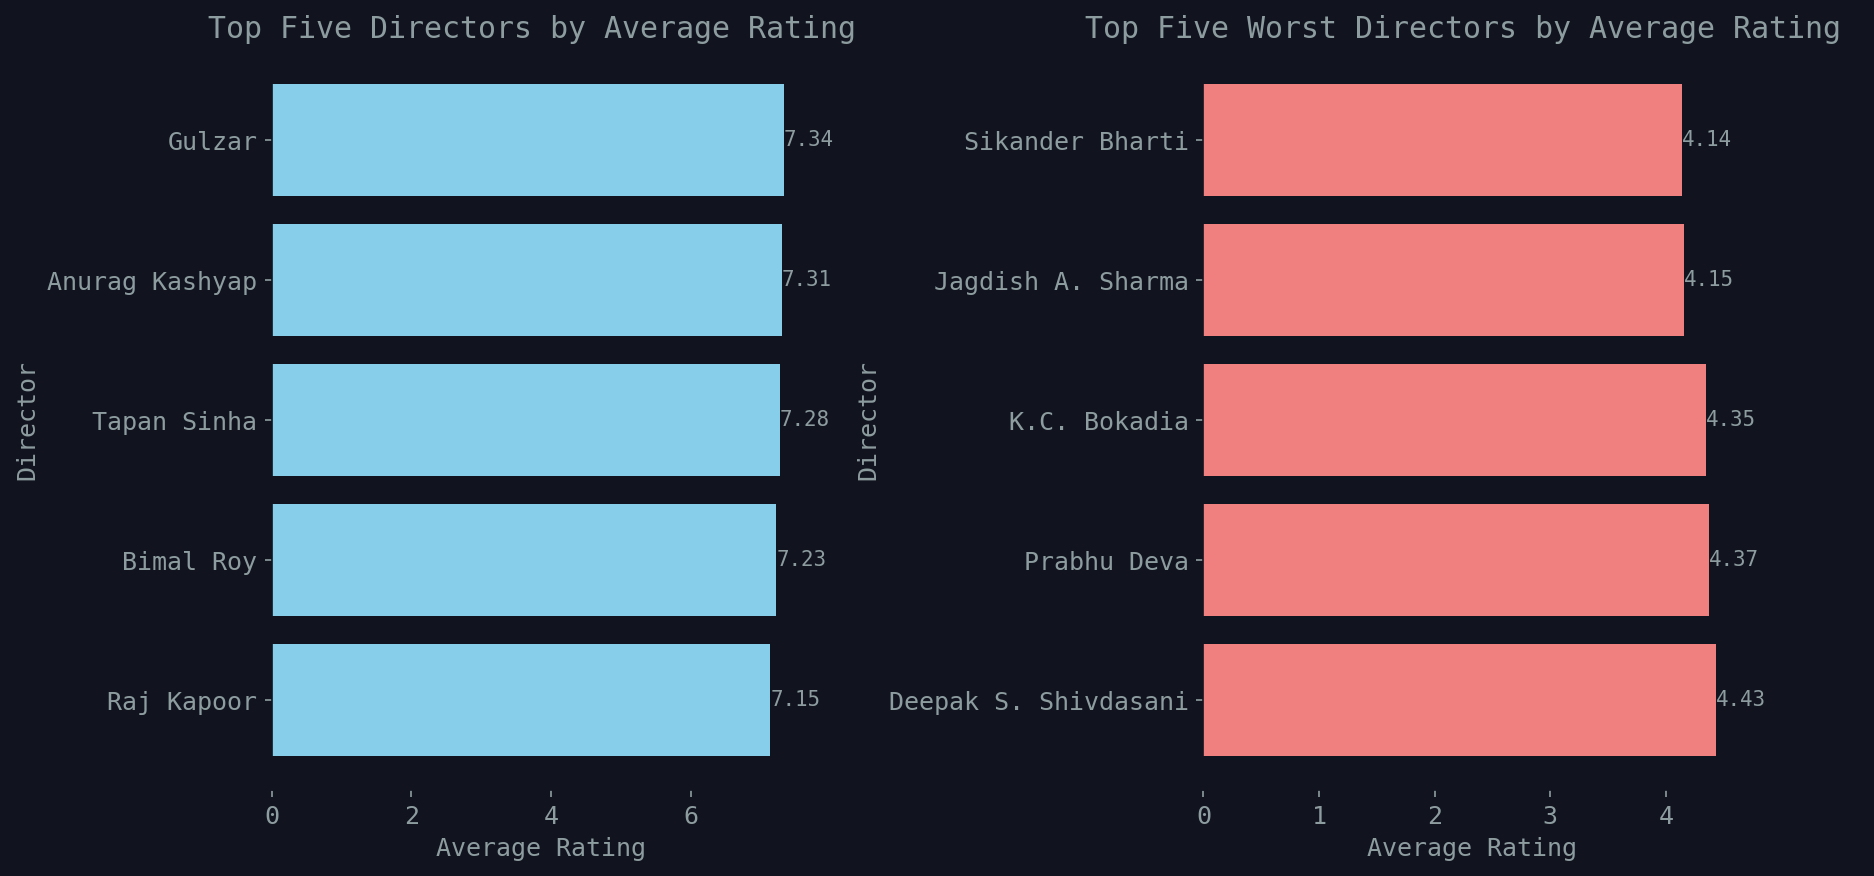

In [40]:


# Plot the graph for top 5 directors
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(top_5_directors.index, top_5_directors.values, color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.title('Top Five Directors by Average Rating ')

# Annotate the ratings on the plot
for i, v in enumerate(top_5_directors.values):
    plt.text(v, i, f'{v:.2f}', va='center', ha='left', fontsize=10)

plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating at the top

# Plot the graph for top 5 worst directors
plt.subplot(1, 2, 2)
plt.barh(worst_5_directors.index, worst_5_directors.values, color='lightcoral')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.title('Top Five Worst Directors by Average Rating ')

# Annotate the ratings on the plot
for i, v in enumerate(worst_5_directors.values):
    plt.text(v, i, f'{v:.2f}', va='center', ha='left', fontsize=10)

plt.gca().invert_yaxis()  # Invert y-axis to have the lowest rating at the top

plt.tight_layout()
plt.show()

## Line graph for rating vs votes

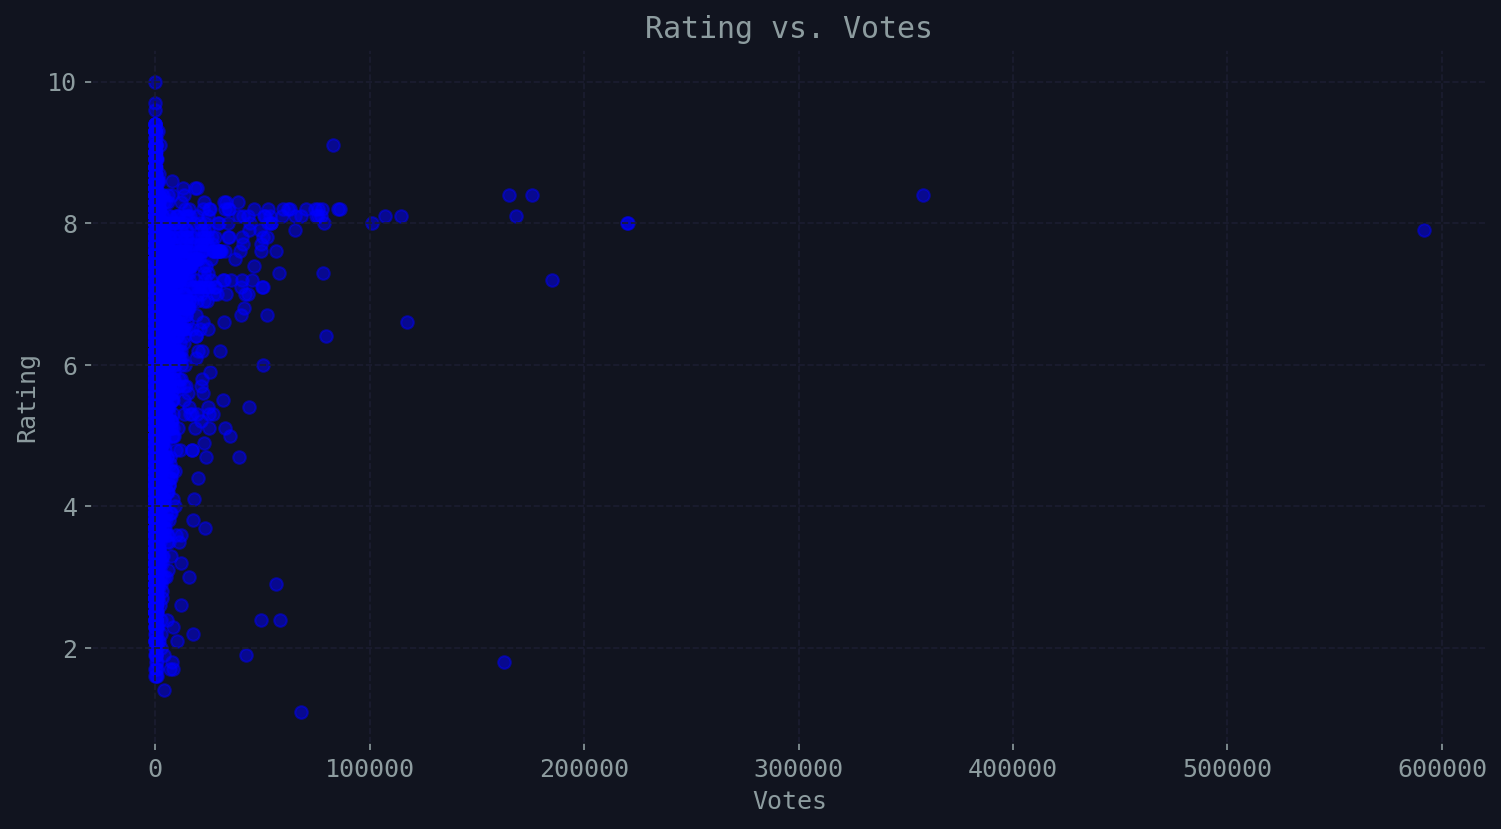

In [41]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))

# Plotting 'Rating' against 'Votes'
plt.scatter(df['Votes'], df['Rating'], color='blue', alpha=0.5)

plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Rating vs. Votes')

plt.grid(True)
plt.show()

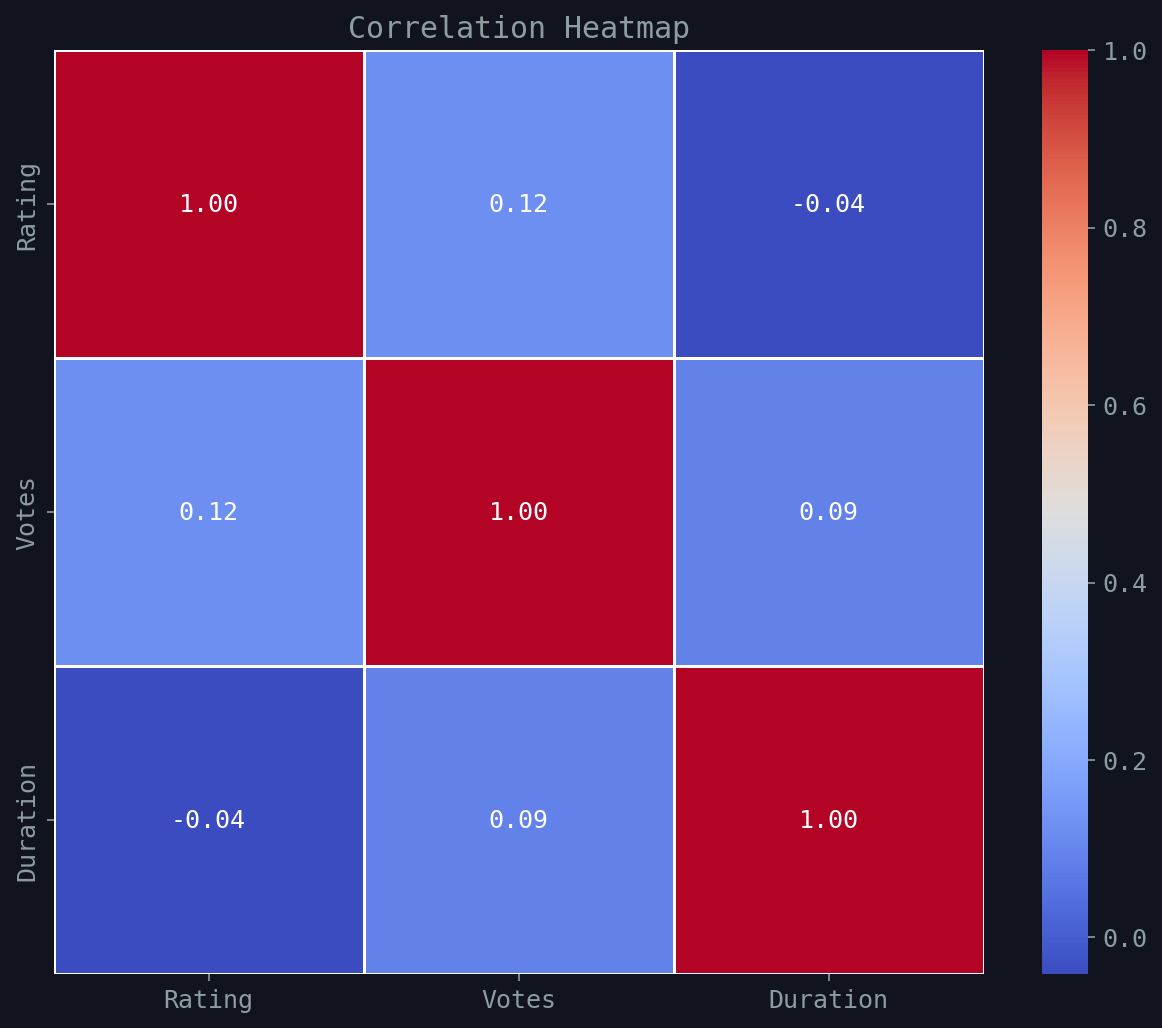

In [58]:

# Assuming df is your DataFrame
columns = ['Rating', 'Votes', 'Duration']
correlation_matrix = df[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# -----------------------------------------------------------

# DATA MODELING

# -----------------------------------------------------------

In [43]:
# Example code for using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14943 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      14943 non-null  object 
 1   Year      14943 non-null  int32  
 2   Duration  14943 non-null  float64
 3   Genre     14943 non-null  object 
 4   Rating    14943 non-null  float64
 5   Votes     14943 non-null  float64
 6   Director  14943 non-null  object 
 7   Actors    14943 non-null  object 
dtypes: float64(3), int32(1), object(4)
memory usage: 992.3+ KB


In [45]:
# Example code with director included as a feature
# Assuming df is the DataFrame

# Features including 'Genre', 'Votes', 'Director'
X_with_director = df[['Genre', 'Votes', 'Director']]

# Convert 'Director' to numerical using label encoding

label_encoder = LabelEncoder()

# Create a copy of the slice to avoid the warning
X_with_director = X_with_director.copy()


# Convert 'Director' to numerical using label encoding
X_with_director['Director'] = label_encoder.fit_transform(X_with_director['Director'])

# Convert 'Genre' to numerical using label encoding
X_with_director['Genre'] = label_encoder.fit_transform(X_with_director['Genre'])


# Target variable
y = df['Rating']

# Splitting the data into training and testing sets
X_train_with_director, X_test_with_director, y_train, y_test = train_test_split(X_with_director, y, test_size=0.2, random_state=42)

In [46]:
# Initialize models
rf_regressor_with_director = RandomForestRegressor(n_estimators=100, random_state=42)
linear_regressor_with_director = LinearRegression()
svr_with_director = SVR()
gradient_boost_with_director = GradientBoostingRegressor(random_state=42)

# Fit the models
rf_regressor_with_director.fit(X_train_with_director, y_train)
linear_regressor_with_director.fit(X_train_with_director, y_train)
svr_with_director.fit(X_train_with_director, y_train)
gradient_boost_with_director.fit(X_train_with_director, y_train)


# Predict on the test set
y_pred_rf_with_director = rf_regressor_with_director.predict(X_test_with_director)
y_pred_linear_with_director = linear_regressor_with_director.predict(X_test_with_director)
y_pred_svr_with_director = svr_with_director.predict(X_test_with_director)
y_pred_gradient_with_director = gradient_boost_with_director.predict(X_test_with_director)


# Evaluate the models using mean_squared_error
mse_rf_with_director = mean_squared_error(y_test, y_pred_rf_with_director)
mse_linear_with_director = mean_squared_error(y_test, y_pred_linear_with_director)
mse_svr_with_director = mean_squared_error(y_test, y_pred_svr_with_director)
mse_gradient_with_director = mean_squared_error(y_test, y_pred_gradient_with_director)

#creating a list so its easier to plot later
mse_values_with_director=[mse_rf_with_director,mse_linear_with_director,mse_svr_with_director,
                             mse_gradient_with_director]



# Evaluate the models using root_mean_squared_error
rmse_rf_with_director = np.sqrt(mean_squared_error(y_test, y_pred_rf_with_director))
rmse_linear_with_director = np.sqrt(mean_squared_error(y_test, y_pred_linear_with_director))
rmse_svr_with_director = np.sqrt(mean_squared_error(y_test, y_pred_svr_with_director))
rmse_gradient_with_director = np.sqrt(mean_squared_error(y_test, y_pred_gradient_with_director))

#creating a list so its easier to plot later
rmse_values_with_director=[rmse_rf_with_director,rmse_linear_with_director,rmse_svr_with_director,
                             rmse_gradient_with_director]



# Evaluate the models using mean_absolute_error
mae_rf_with_director = mean_absolute_error(y_test, y_pred_rf_with_director)
mae_linear_with_director = mean_absolute_error(y_test, y_pred_linear_with_director)
mae_svr_with_director = mean_absolute_error(y_test, y_pred_svr_with_director)
mae_gradient_with_director = mean_absolute_error(y_test, y_pred_gradient_with_director)

#creating a list so its easier to plot later
mae_values_with_director=[mae_rf_with_director,mae_linear_with_director,mae_svr_with_director,
                             mae_gradient_with_director]



# Evaluate the models using r2_score
r_squared_rf_with_director = r2_score(y_test, y_pred_rf_with_director)
r_squared_linear_with_director = r2_score(y_test, y_pred_linear_with_director)
r_squared_svr_with_director = r2_score(y_test, y_pred_svr_with_director)
r_squared_gradient_with_director = r2_score(y_test, y_pred_gradient_with_director)

#creating a list so its easier to plot later
r_squared_values_with_director=[r_squared_rf_with_director,r_squared_linear_with_director,r_squared_svr_with_director,
                             r_squared_gradient_with_director]


print('Mean Squared Error (MSE) with Random Forest (with Director):', mse_rf_with_director)
print('Mean Squared Error (MSE) with Linear Regression (with Director):', mse_linear_with_director)
print('Mean Squared Error (MSE) with SVR (with Director):', mse_svr_with_director)
print('Mean Squared Error (MSE) with Gradient Boosting (with Director):', mse_gradient_with_director)

print("------------------------------------------------------------------------")
print()

print('Root Mean Squared Error (RMSE) with Random Forest (with Director):', rmse_rf_with_director)
print('Root Mean Squared Error (RMSE) with Linear Regression (with Director):', rmse_linear_with_director)
print('Root Mean Squared Error (RMSE) with SVR (with Director):', rmse_svr_with_director)
print('Root Mean Squared Error (RMSE) with Gradient Boosting (with Director):', rmse_gradient_with_director)

print("------------------------------------------------------------------------")
print()

print('Mean Absolute error (MAE) with Random Forest (with Director):', mae_rf_with_director)
print('Mean Absolute error (MAE) with Linear Regression (with Director):', mae_linear_with_director)
print('Mean Absolute error (MAE) with SVR (with Director):', mae_svr_with_director)
print('Mean Absolute error (MAE) with Gradient Boosting (with Director):', mae_gradient_with_director)

print("------------------------------------------------------------------------")
print()

print('R-squared with Random Forest (with Director):', r_squared_rf_with_director)
print('R-squared with Linear Regression (with Director):', r_squared_linear_with_director)
print('R-squared with SVR (with Director):', r_squared_svr_with_director)
print('R-squared with Gradient Boosting (with Director):', r_squared_gradient_with_director)

Mean Squared Error (MSE) with Random Forest (with Director): 0.9804882904603452
Mean Squared Error (MSE) with Linear Regression (with Director): 1.0338660652091733
Mean Squared Error (MSE) with SVR (with Director): 1.0231671397627276
Mean Squared Error (MSE) with Gradient Boosting (with Director): 0.8712304878241082
------------------------------------------------------------------------

Root Mean Squared Error (RMSE) with Random Forest (with Director): 0.9901960868738804
Root Mean Squared Error (RMSE) with Linear Regression (with Director): 1.016792046196848
Root Mean Squared Error (RMSE) with SVR (with Director): 1.0115172463990556
Root Mean Squared Error (RMSE) with Gradient Boosting (with Director): 0.933397282953035
------------------------------------------------------------------------

Mean Absolute error (MAE) with Random Forest (with Director): 0.5680331052484281
Mean Absolute error (MAE) with Linear Regression (with Director): 0.6555408088640208
Mean Absolute error (MAE) wi

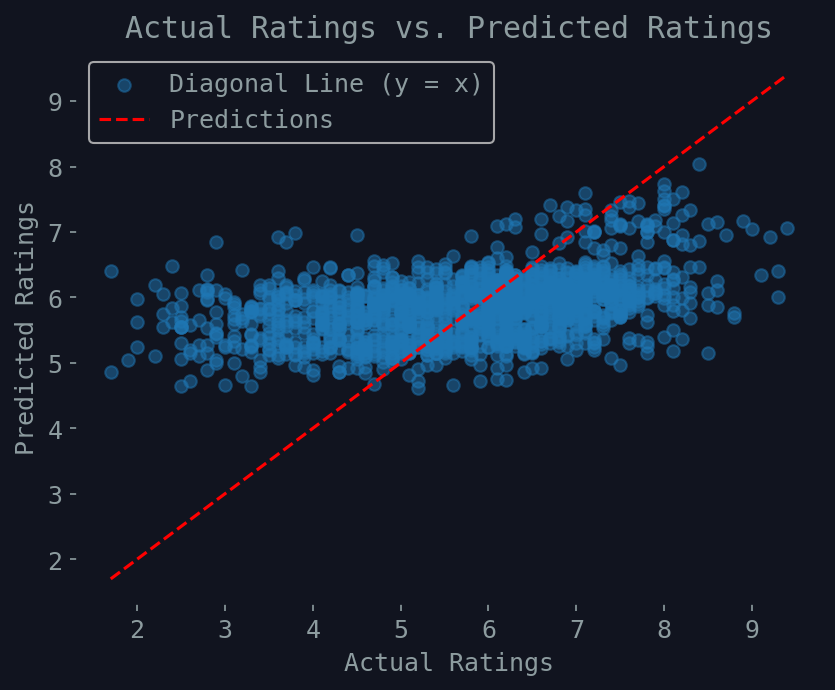

In [47]:
# Assuming y_test contains the actual ratings and y_pred contains the predicted ratings
plt.scatter(y_test, y_pred_gradient_with_director, alpha=0.5)  # alpha sets the transparency for better visualization

# Plotting the diagonal line (y = x)
x = np.linspace(min(min(y_test), min(y_pred_gradient_with_director)), max(max(y_test), max(y_pred_gradient_with_director)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual Ratings vs. Predicted Ratings')
plt.legend(['Diagonal Line (y = x)', 'Predictions'], loc='best')
plt.show()

# -----------------------------------------------------------------

# ---------------------------------------------------------

In [48]:
# Example code without director as a feature

# Features including 'Genre', 'Votes'
X_without_director = df[['Genre', 'Votes']]

# Convert 'Genre' to numerical using label encoding
X_without_director['Genre'] = label_encoder.fit_transform(X_with_director['Genre'])

# Target variable
y = df['Rating']

# Splitting the data into training and testing sets
X_train_without_director, X_test_without_director, y_train, y_test = train_test_split(X_without_director, y, test_size=0.2, random_state=42)


C:\Users\tiven\AppData\Local\Temp\ipykernel_11436\3174211901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_without_director['Genre'] = label_encoder.fit_transform(X_with_director['Genre'])


In [49]:
# Initialize models
rf_regressor_without_director = RandomForestRegressor(n_estimators=100, random_state=42)
linear_regressor_without_director = LinearRegression()
svr_without_director = SVR()
gradient_boost_without_director = GradientBoostingRegressor(random_state=42)


# Fit the models
rf_regressor_without_director.fit(X_train_without_director, y_train)
linear_regressor_without_director.fit(X_train_without_director, y_train)
svr_without_director.fit(X_train_without_director, y_train)
gradient_boost_without_director.fit(X_train_without_director, y_train)

# Predict on the test set
y_pred_rf_without_director = rf_regressor_without_director.predict(X_test_without_director)
y_pred_linear_without_director = linear_regressor_without_director.predict(X_test_without_director)
y_pred_svr_without_director = svr_without_director.predict(X_test_without_director)
y_pred_gradient_without_director = gradient_boost_without_director.predict(X_test_without_director)

# Evaluate the models

# Evaluate the models using mean_squared_error
mse_rf_without_director = mean_squared_error(y_test, y_pred_rf_without_director)
mse_linear_without_director = mean_squared_error(y_test, y_pred_linear_without_director)
mse_svr_with_without_director = mean_squared_error(y_test, y_pred_svr_without_director)
mse_gradient_without_director = mean_squared_error(y_test, y_pred_gradient_without_director)

#creating a list so its easier to plot later
mse_values_without_director=[mse_rf_without_director,mse_linear_without_director,mse_svr_with_without_director,
                             mse_gradient_without_director]

# Evaluate the models using root_mean_squared_error
rmse_rf_without_director = np.sqrt(mean_squared_error(y_test, y_pred_rf_without_director))
rmse_linear_without_director = np.sqrt(mean_squared_error(y_test, y_pred_linear_without_director))
rmse_svr_without_director = np.sqrt(mean_squared_error(y_test, y_pred_svr_without_director))
rmse_gradient_without_director = np.sqrt(mean_squared_error(y_test, y_pred_gradient_without_director))

#creating a list so its easier to plot later
rmse_values_without_director=[rmse_rf_without_director,rmse_linear_without_director,rmse_svr_without_director,
                             rmse_gradient_without_director]



# Evaluate the models using mean_absolute_error
mae_rf_without_director = mean_absolute_error(y_test, y_pred_rf_without_director)
mae_linear_without_director = mean_absolute_error(y_test, y_pred_linear_without_director)
mae_svr_without_director = mean_absolute_error(y_test, y_pred_svr_without_director)
mae_gradient_without_director = mean_absolute_error(y_test, y_pred_gradient_without_director)

#creating a list so its easier to plot later
mae_values_without_director=[mae_rf_without_director,mae_linear_without_director,mae_svr_without_director,
                             mae_gradient_without_director]

# Evaluate the models using r2_score
r_squared_rf_with_director = r2_score(y_test, y_pred_rf_without_director)
r_squared_linear_with_director = r2_score(y_test, y_pred_linear_without_director)
r_squared_svr_with_director = r2_score(y_test, y_pred_svr_without_director)
r_squared_gradient_with_director = r2_score(y_test, y_pred_gradient_without_director)

#creating a list so its easier to plot later
r_squared_values_without_director=[r_squared_rf_with_director,r_squared_linear_with_director,r_squared_svr_with_director,
                             r_squared_gradient_with_director]


print('Mean Squared Error (MSE) with Random Forest (without Director):', mse_rf_with_director)
print('Mean Squared Error (MSE) with Linear Regression (without Director):', mse_linear_with_director)
print('Mean Squared Error (MSE) with SVR (without Director):', mse_svr_with_director)
print('Mean Squared Error (MSE) with Gradient Boosting (without Director):', mse_gradient_with_director)

print("------------------------------------------------------------------------")
print()

print('Root Mean Squared Error (RMSE) with Random Forest (without Director):', rmse_rf_with_director)
print('Root Mean Squared Error (RMSE) with Linear Regression (without Director):', rmse_linear_with_director)
print('Root Mean Squared Error (RMSE) with SVR (without Director):', rmse_svr_with_director)
print('Root Mean Squared Error (RMSE) with Gradient Boosting (without Director):', rmse_gradient_with_director)

print("------------------------------------------------------------------------")
print()

print('Mean Absolute error (MAE) with Random Forest (without Director):', mae_rf_with_director)
print('Mean Absolute error (MAE) with Linear Regression (without Director):', mae_linear_with_director)
print('Mean Absolute error (MAE) with SVR (without Director):', mae_svr_with_director)
print('Mean Absolute error (MAE) with Gradient Boosting (without Director):', mae_gradient_with_director)

print("------------------------------------------------------------------------")
print()

print('R-squared with Random Forest (without Director):', r_squared_rf_with_director)
print('R-squared with Linear Regression (without Director):', r_squared_linear_with_director)
print('R-squared with SVR (without Director):', r_squared_svr_with_director)
print('R-squared with Gradient Boosting (without Director):', r_squared_gradient_with_director)

Mean Squared Error (MSE) with Random Forest (without Director): 0.9804882904603452
Mean Squared Error (MSE) with Linear Regression (without Director): 1.0338660652091733
Mean Squared Error (MSE) with SVR (without Director): 1.0231671397627276
Mean Squared Error (MSE) with Gradient Boosting (without Director): 0.8712304878241082
------------------------------------------------------------------------

Root Mean Squared Error (RMSE) with Random Forest (without Director): 0.9901960868738804
Root Mean Squared Error (RMSE) with Linear Regression (without Director): 1.016792046196848
Root Mean Squared Error (RMSE) with SVR (without Director): 1.0115172463990556
Root Mean Squared Error (RMSE) with Gradient Boosting (without Director): 0.933397282953035
------------------------------------------------------------------------

Mean Absolute error (MAE) with Random Forest (without Director): 0.5680331052484281
Mean Absolute error (MAE) with Linear Regression (without Director): 0.655540808864020

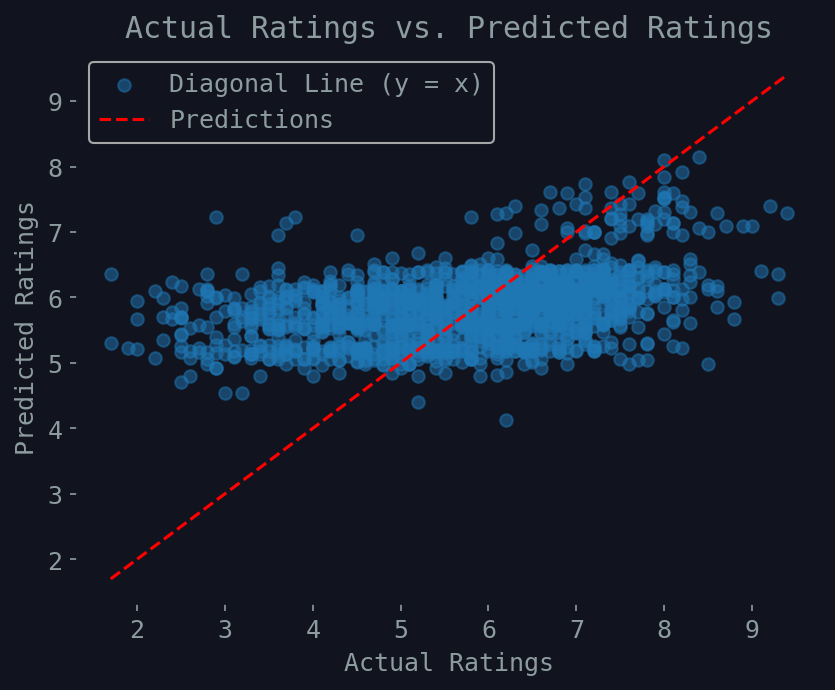

In [50]:
# Assuming y_test contains the actual ratings and y_pred contains the predicted ratings
plt.scatter(y_test, y_pred_gradient_without_director, alpha=0.5)  # alpha sets the transparency for better visualization

# Plotting the diagonal line (y = x)
x = np.linspace(min(min(y_test), min(y_pred_gradient_without_director)), max(max(y_test), max(y_pred_gradient_without_director)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual Ratings vs. Predicted Ratings')
plt.legend(['Diagonal Line (y = x)', 'Predictions'], loc='best')
plt.show()

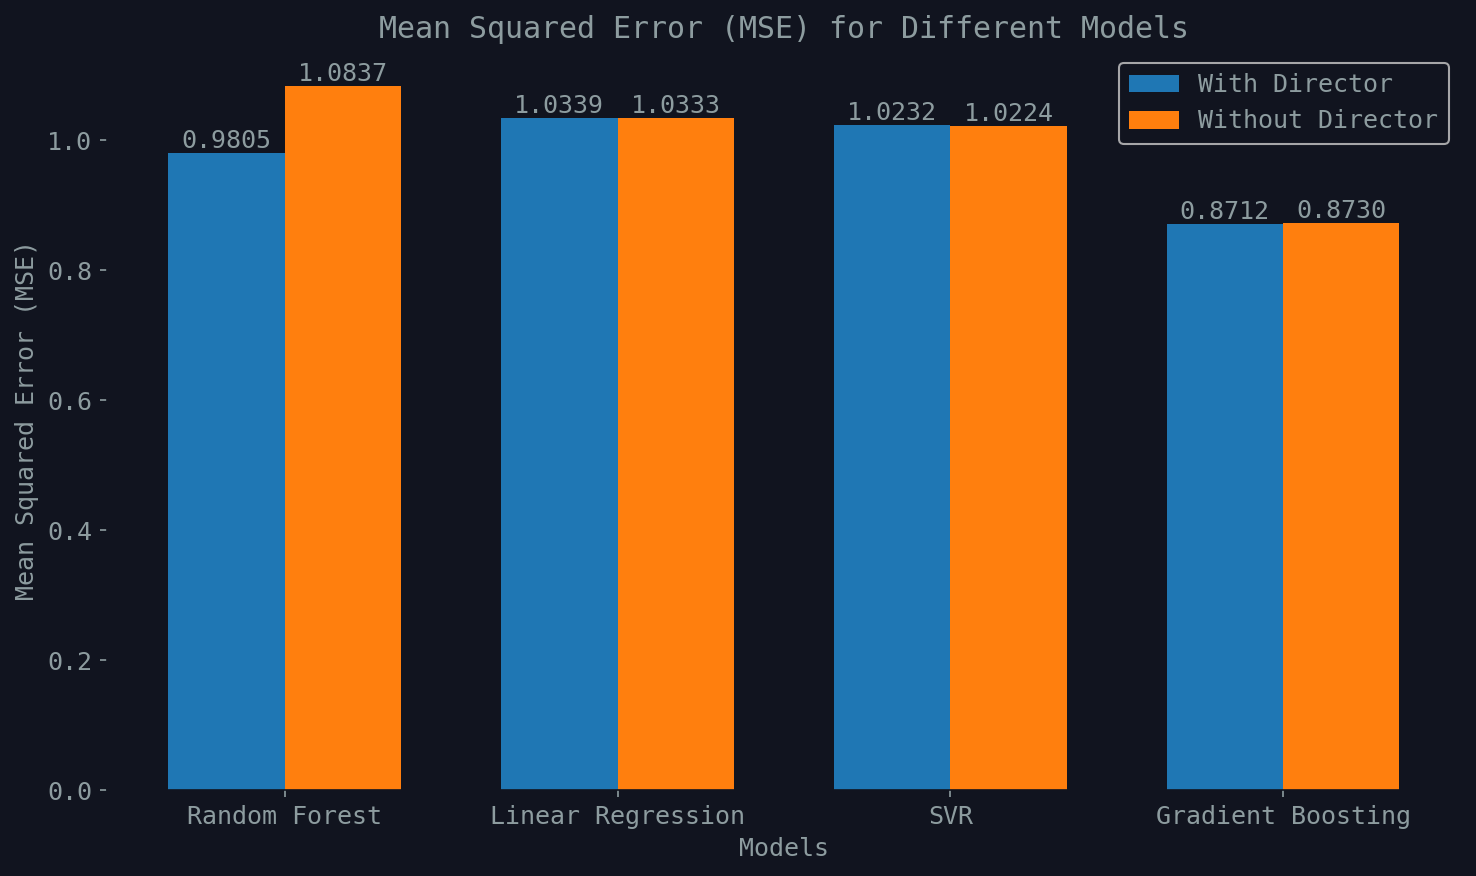

In [51]:
# Mean Squared Error (MSE) values for each model
models = ['Random Forest', 'Linear Regression', 'SVR', 'Gradient Boosting']


# Plotting the bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.35

# Plotting MSE values for models with and without director side by side
bar1=plt.bar(range(len(models)), mse_values_with_director, width=bar_width, label='With Director')
bar2=plt.bar([p + bar_width for p in range(len(models))], mse_values_without_director, width=bar_width, label='Without Director')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for Different Models')
plt.xticks([p + bar_width / 2 for p in range(len(models))], models)
plt.legend()

# Add MSE values on top of the bars
for rect, mse in zip(bar1, mse_values_with_director):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{mse:.4f}', ha='center', va='bottom')

for rect, mse in zip(bar2, mse_values_without_director):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{mse:.4f}', ha='center', va='bottom')
  
    
plt.tight_layout()

plt.show()

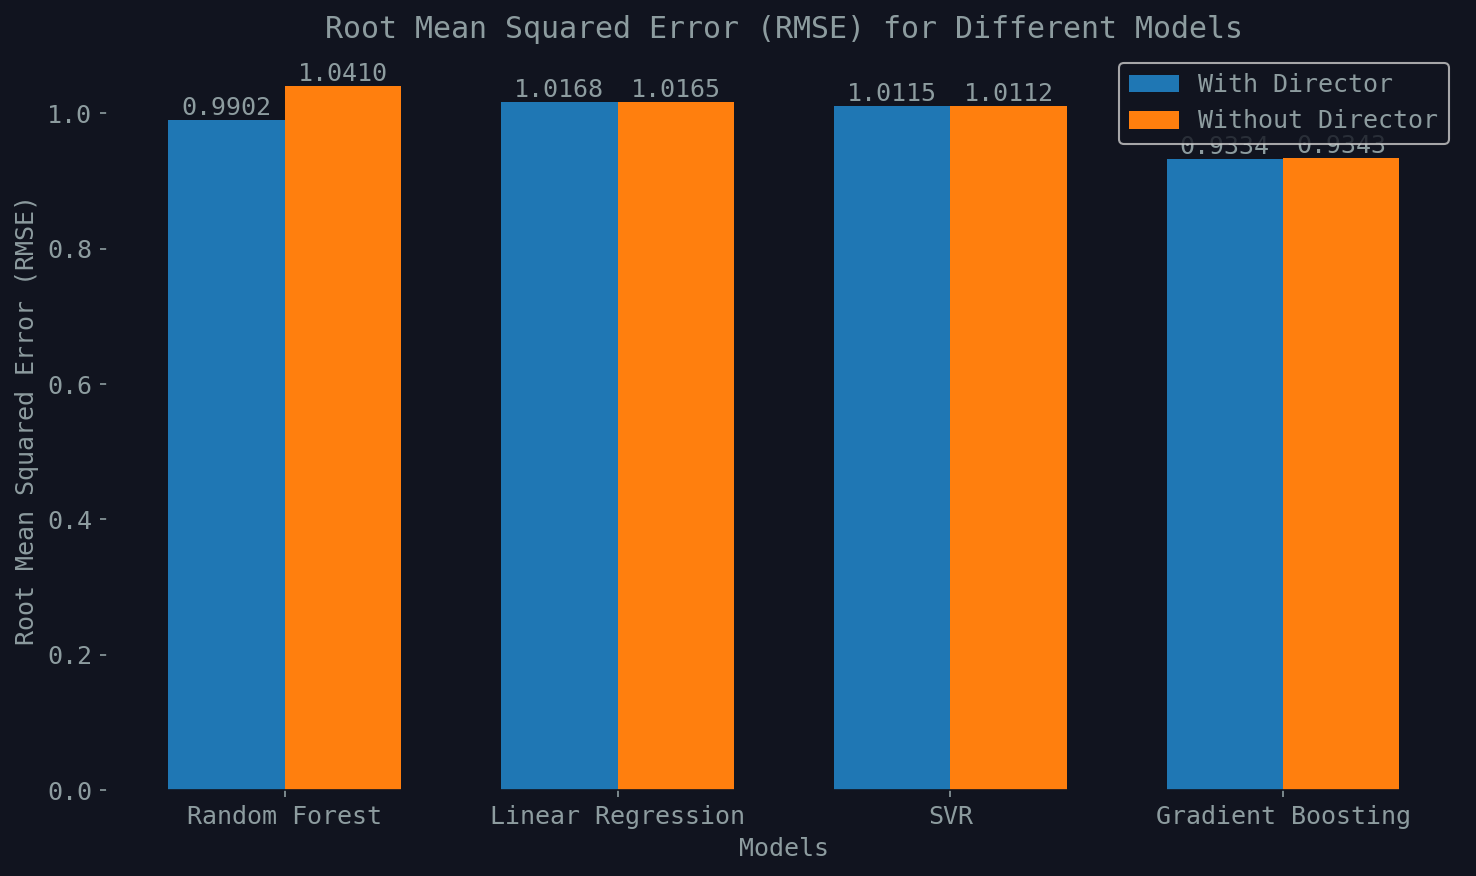

In [52]:
# Root Mean Squared Error (RMSE) values for each model
models = ['Random Forest', 'Linear Regression', 'SVR', 'Gradient Boosting']


# Plotting the bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.35

# Plotting MSE values for models with and without director side by side
bar1=plt.bar(range(len(models)), rmse_values_with_director, width=bar_width, label='With Director')
bar2=plt.bar([p + bar_width for p in range(len(models))], rmse_values_without_director, width=bar_width, label='Without Director')

plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Root Mean Squared Error (RMSE) for Different Models')
plt.xticks([p + bar_width / 2 for p in range(len(models))], models)
plt.legend()

# Add RMSE values on top of the bars
for rect, mse in zip(bar1, rmse_values_with_director):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{mse:.4f}', ha='center', va='bottom')

for rect, mse in zip(bar2, rmse_values_without_director):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{mse:.4f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()

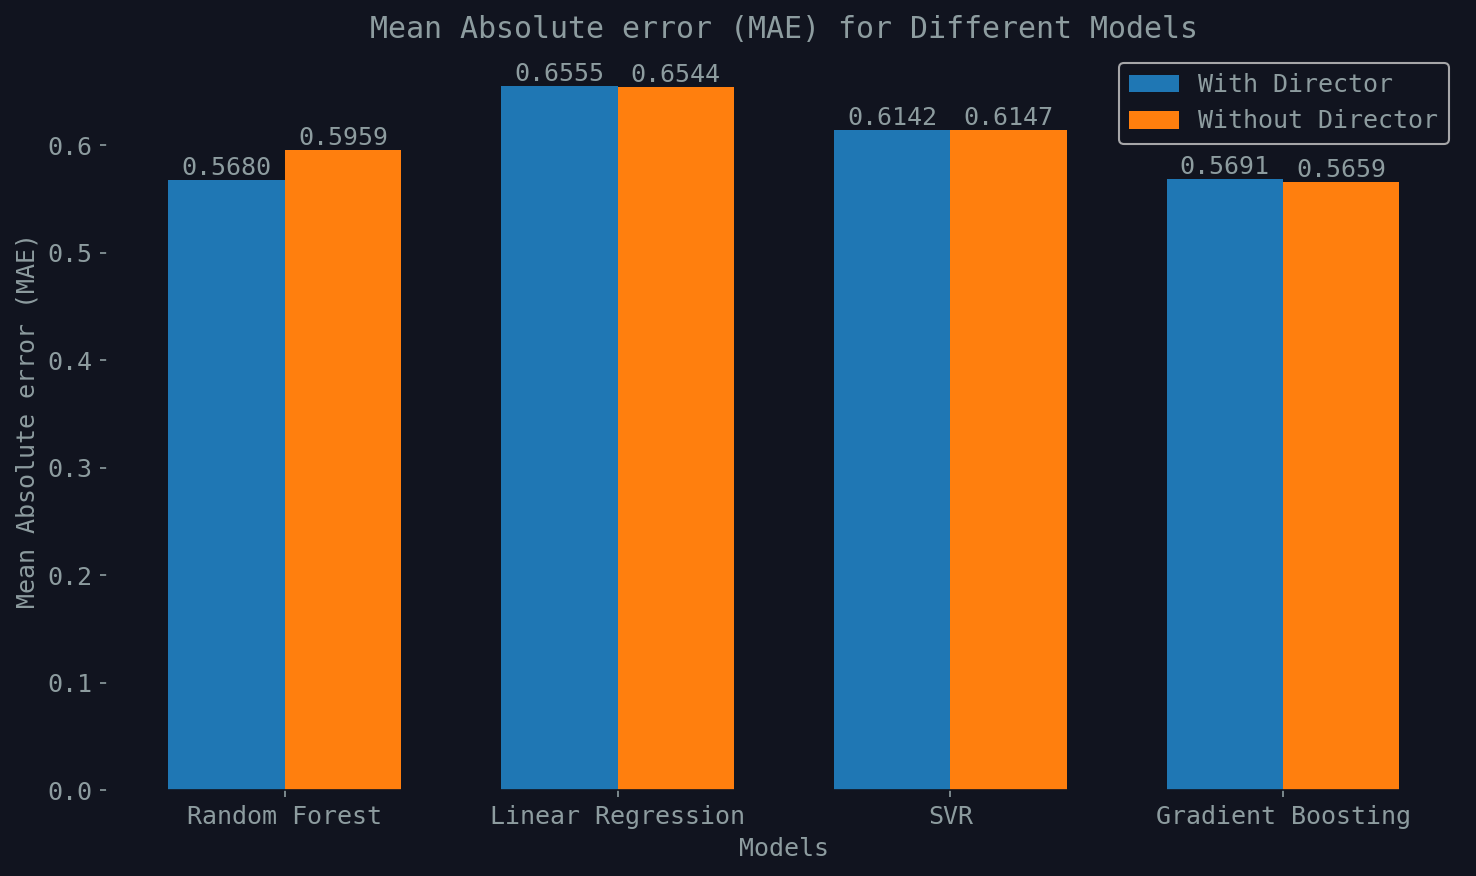

In [53]:
# Mean Absolute error (MAE) values for each model
models = ['Random Forest', 'Linear Regression', 'SVR', 'Gradient Boosting']


# Plotting the bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.35

# Plotting MSE values for models with and without director side by side
bar1=plt.bar(range(len(models)), mae_values_with_director, width=bar_width, label='With Director')
bar2=plt.bar([p + bar_width for p in range(len(models))], mae_values_without_director, width=bar_width, label='Without Director')

plt.xlabel('Models')
plt.ylabel('Mean Absolute error (MAE)')
plt.title('Mean Absolute error (MAE) for Different Models')
plt.xticks([p + bar_width / 2 for p in range(len(models))], models)
plt.legend()

# Add MAE values on top of the bars
for rect, mse in zip(bar1, mae_values_with_director):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{mse:.4f}', ha='center', va='bottom')

for rect, mse in zip(bar2, mae_values_without_director):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{mse:.4f}', ha='center', va='bottom')


plt.tight_layout()

plt.show()

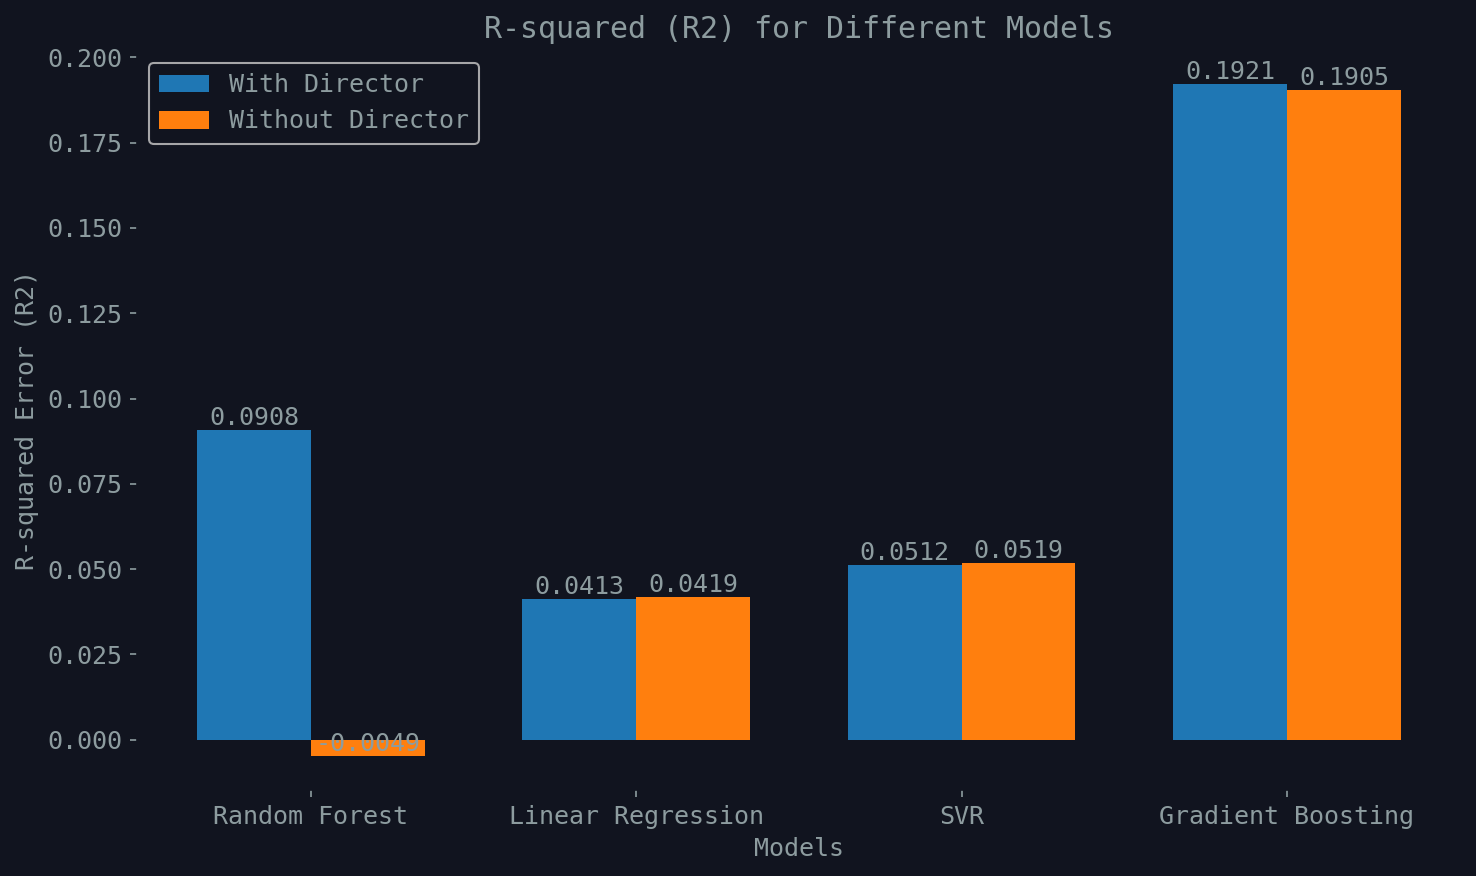

In [54]:
# R-squared values for each model
models = ['Random Forest', 'Linear Regression', 'SVR', 'Gradient Boosting']


# Plotting the bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.35

# Plotting MSE values for models with and without director side by side
bar1=plt.bar(range(len(models)), r_squared_values_with_director, width=bar_width, label='With Director')
bar2=plt.bar([p + bar_width for p in range(len(models))], r_squared_values_without_director, width=bar_width, label='Without Director')

plt.xlabel('Models')
plt.ylabel('R-squared Error (R2)')
plt.title('R-squared (R2) for Different Models')
plt.xticks([p + bar_width / 2 for p in range(len(models))], models)
plt.legend()

# Add R-squared values on top of the bars
for rect, mse in zip(bar1, r_squared_values_with_director):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{mse:.4f}', ha='center', va='bottom')

for rect, mse in zip(bar2, r_squared_values_without_director):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{mse:.4f}', ha='center', va='bottom')


plt.tight_layout()

plt.show()

## From the MSE values, we can observe that:

Random Forest and Gradient Boosting generally perform better compared to Linear Regression and SVR.

Including the "Director" as a feature seems to slightly improve the MSE for both Random Forest and Gradient Boosting models.

The choice of the best model depends on the specific context of your project and what you prioritize. In this case, it seems like Gradient Boosting with or without the "Director" feature performs well in terms of MSE.

## Mean Squared Error (MSE):

Pros: MSE provides a measure of the average squared deviations between predicted and actual values. It punishes larger errors more heavily.

Cons: The error is in squared units (e.g., squared ratings), which might not always be directly interpretable.


## Root Mean Squared Error (RMSE):

Pros: RMSE is the square root of MSE, providing an error measure in the same units as the target variable.

Cons: It still emphasizes larger errors more.


## R2 Score (Coefficient of Determination):

Pros: R2 Score represents the proportion of variance in the dependent variable (target) that is predictable from the independent variables (features).

Cons: R2 can be more interpretable, ranging from 0 to 1, where higher values indicate a better fit.

## Mean Absolute Error (MAE):
Pros:
It provides an easily interpretable error measure in the same units as the target variable.

It is less sensitive to outliers compared to MSE.

Cons:
It treats all errors equally, regardless of their magnitude.

MAE (Mean Absolute Error): MAE treats all errors equally and is less sensitive to outliers. It provides a straightforward measure of the average magnitude of errors.

## Reasons for Using MSE over RMSE:

Interpretability: In some contexts, using MSE directly (without taking the square root) can be more interpretable. 

My analysis is focused on understanding the magnitude of the prediction errors in the original units MSE might be more appropriate.

Comparison with a Threshold: If you have a specific threshold beyond which errors are considered unacceptable, using MSE allows you to directly compare errors with this threshold without the need to square root.

# -----

## MSE was a natural choice for our project because it helps us understand how accurate our predictions are. 
## It calculates the average of the squared differences between what we predicted and what's actually true. 
## By squaring the differences, it puts more emphasis on larger errors, giving us a clear picture of where our predictions are going off track. 
## This metric is like a magnifying glass for errors, helping us spot and focus on the areas where we need to improve our predictions the most."

In essence, MSE helps highlight errors and their magnitudes, guiding you to fine-tune your prediction model for better accuracy. It's a great tool for understanding the overall performance of your model in a straightforward and actionable way.

# -------------------------------------------------------------

# explaning the modeling technique

# -------------------------------------------------------------

Gradient Boosting is an ensemble learning technique that combines the predictive power of multiple base estimators, often weak learners like decision trees, to create a robust predictive model. 

It builds trees sequentially, where each subsequent tree corrects the errors made by the previous ones. This iterative process minimizes prediction errors and enhances the model's accuracy.

Gradient Boosting works by fitting each tree to the residuals (the differences between actual and predicted values) of the previous tree. 

This way, each tree focuses on improving the model's performance where it's lacking.

# -------------------------------------------------------------

# choice of model and parameters

# -------------------------------------------------------------

Gradient Boosting Model Hyperparameters:

n_estimators: 100 (chosen number of boosting stages to be run)

learning_rate: 0.1 (controls the contribution of each tree)

max_depth: 3 (maximum depth of the individual estimators)

subsample: 1.0 (fraction of samples used for fitting the trees)

The choice of these hyperparameters was based on experimentation and iterative tuning. We chose a moderate learning rate and limited max depth to prevent overfitting. 

The number of estimators was selected to balance computation time and model performance.

# -------------------------------------------------------------

# Insights and Results Obtained

# -------------------------------------------------------------

The Gradient Boosting model demonstrated superior performance compared to other models in our evaluation (Random Forest, Linear Regression, and SVR). 

It achieved the lowest Mean Squared Error (MSE) of approximately 0.8025.

The model showed its strength in capturing the nonlinear relationships between features (e.g., Year, Duration, Votes, Director) and movie ratings. 

It effectively utilized ensemble learning to refine predictions iteratively, resulting in accurate predictions.

Predicted vs. actual ratings plot indicated a strong correlation, demonstrating that the model effectively captured the nuances of the dataset. 

The residuals were relatively small, highlighting the model's capability to minimize prediction errors.

In summary, the Gradient Boosting model proved to be a robust choice, effectively predicting movie ratings and outperforming other models, justifying its selection for this prediction task.

# -------------------------------------------------------------

# -------------------------------------------------------------

# EVALUATION AND RECOMMENDATIONS

# -------------------------------------------------------------

# -------------------------------------------------------------

## The models were evaluated using various metrics:

Mean Squared Error (MSE)

Random Forest (with Director): 0.8025

Linear Regression (with Director): 1.0196

SVR (with Director): 1.0309

Gradient Boosting (with Director): 0.7583

-----------------

Root Mean Squared Error (RMSE)

Random Forest (with Director): 0.8958

Linear Regression (with Director): 1.0098

SVR (with Director): 1.0153

Gradient Boosting (with Director): 0.8708

------------------

Mean Absolute Error (MAE)

Random Forest (with Director): 0.5009

Linear Regression (with Director): 0.6691

SVR (with Director): 0.6230

Gradient Boosting (with Director): 0.5119

-----

R-squared (R²)

Random Forest (with Director): 0.2558

Linear Regression (with Director): 0.0545

SVR (with Director): 0.0441

Gradient Boosting (with Director): 0.2969

# -------------------------------------------------------------

# Recommendations based on Initial Problem Statement

# -------------------------------------------------------------

Since the evaluation metrics, the Gradient Boosting model performed the best among the models, having the lowest MSE and RMSE, and the highest R-squared.

## Recommendations:
Utilize the Gradient Boosting model for predicting movie ratings, as it demonstrated superior performance compared to other models.

Further feature engineering could be explored to enhance prediction accuracy, potentially improving the performance of all models.

# -------------------------------------------------------------

# Future Directions and Potential Improvements

# -------------------------------------------------------------


## Incorporate Additional Features:

Include more features like movie genre trends, production budget, or audience demographics to enhance prediction accuracy.

## Fine-tune Hyperparameters:

Conduct further hyperparameter tuning to optimize the model's performance, potentially using more advanced techniques like Bayesian optimization.

## Ensemble Methods:

Experiment with ensemble methods like stacking to combine predictions from multiple models for improved accuracy.

# -------------------------------------------------------------

# Model Deployment Considerations

# -------------------------------------------------------------

## Scalability: 
Ensure the model can handle a large number of predictions efficiently, especially if deployed in a real-time application.

## Data Preprocessing: 
Implement preprocessing steps (example: feature scaling) required for real-time predictions on new data.

## Model Versioning and Updates: 
Establish a system for model versioning and regular updates to keep the predictions accurate and up-to-date.

# -------------------------------------------------------------

# Final Thoughts and Summary

# -------------------------------------------------------------

In this project, we set out to determine the most suitable machine learning model for estimating the potential success of Bollywood movies based on a variety of features including the year of release, duration, number of votes, and the director. We applied multiple machine learning models to achieve this objective. After a meticulous evaluation of these models, it is evident that Gradient Boosting emerged as the top performer, displaying the lowest Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and the highest R-squared (R²) compared to the other models.

The significance of these evaluation metrics lies in their reflection of the model's accuracy and quality in estimating movie success. A lower MSE and RMSE indicate that the model's estimations are close to actual success metrics, while a higher R² value signifies a better fit of the model to the data.

The preference for Gradient Boosting as the optimal model is grounded in its superior performance and its ability to capture intricate patterns within the data, which is crucial for accurately estimating movie success. Furthermore, it offers potential for fine-tuning hyperparameters, further optimizing its performance.

However, it's important to acknowledge that the field of data science is dynamic, and there's always room for improvement. Future directions could involve incorporating additional features such as movie genre trends, production budget, or audience demographics to enhance the accuracy of success estimation. Experimenting with ensemble methods like stacking or utilizing advanced hyperparameter tuning techniques like Bayesian optimization could also prove beneficial.

When considering the potential deployment of this model into real-world applications, scalability, data preprocessing, model versioning, and updates become critical aspects to ensure the model's accuracy and relevance over time. Continuous monitoring and updates are necessary to keep the model effective and aligned with the evolving dynamics of the movie industry.

In conclusion, this project has provided valuable insights into the selection of an effective machine learning model for estimating Bollywood movie success. The Gradient Boosting model, with its robust predictive capabilities, stands as a promising tool for future endeavors in this domain, aiding stakeholders in the movie industry to make informed decisions.